<a href="https://colab.research.google.com/github/Steve-YJ/Colab_Exercise/blob/master/Exp06_Test_change_optimizer_param_sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## readme.md
* Train Again
* Original Kingma's VAE
    * lr: 1e-3
    * optimizer params: mean -> sum
    * Add plot: Train_Test Plot
    * Save model's state dict

* Reference Git repository: https://github.com/pytorch/examples/tree/master/vae

In [ ]:
## modeling을 하면서 Flow를 익히자!
## Practice PyTorch & Learning the process of training

autoreload를 항상 하는 습관!

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Drive Mount

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd drive/My\ Drive/InformationSecurity_Summer
! pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/InformationSecurity_Summer
/content/drive/My Drive/InformationSecurity_Summer


## #01. Import Library

In [ ]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.utils.data

from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np

import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image

## #2. Data Preprocessing

- Load dataset
- preprocess it

    * transform
    * make custom dataset
    * train_test split: <code>torch.utils.data.random_split</code>
    * train_test_loader

### WorkFlow
* transforms을 사용해 image data compose 하기
    * size 조장, normalize, tensor 변환
* ImageFolder를 이용해 dataload하기
* dataset split
* DataLoader로 dataset 불러오기(batch)


* Reference: https://blog.naver.com/reisei11/221733757476

* transroms을 사용해 Image data compose
* ImageFolder를 사용해 dataload

In [ ]:
transforms = transforms.Compose([
                                transforms.Resize((224, 224)),                # Change size of Image to (224, 224)
                                transforms.Grayscale(num_output_channels=1),  # Makes it 1-dimension channel
                                transforms.ToTensor(),                        # Convert a PIL Image or numpy.ndarray to tensor.
                                                                              # Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8
                                                                              # In the other cases, tensors are returned without scaling.
                                # transforms.Normalize(mean=[0.5], std=[0.5]),
                                
                                ])
# trainset = torchvision.datasets.ImageFolder(root="/content/drive/My Drive/Malimg_Exp_200611/malimg",
#                                             transforms = transform)
trainset = torchvision.datasets.ImageFolder(root='./malimg',
                                            transform=transforms)  # make custom datasetom

In [ ]:
classes = trainset.classes
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.P',
 'C2LOP.gen!g',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

* data_split
* train_dataset, test_dataset

In [ ]:
full_dataset = trainset
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

* train_test DataLoader 만들기

In [ ]:
train_loader = DataLoader(train_dataset,
                          batch_size=16,
                          shuffle=True,
                          pin_memory=True)
test_loader = DataLoader(test_dataset,
                         batch_size=16,
                         shuffle=True,
                         pin_memory=True)  # Instead, we recommend using automatic memory pinning (i.e., setting pin_memory=True)
                                           #  which enables fast data transfer to CUDA-enabled GPUs

이미지를 뿌려보자

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnomalize <- but... we dont normalize the data??!
    np_img = img.numpy()

    plt.imshow(np.transpose(img, (1, 2, 0)))  # Convert (C, W, H) to (W, H, C)

    print(np_img.shape)  # np_img shape
    print((np.transpose(np_img, (1, 2, 0))).shape)

In [ ]:
# see one element at time

dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels)

tensor([10, 16,  3, 18, 11, 24, 24, 13, 12, 24, 12,  2, 22,  3,  2, 10])


torch.Size([16, 1, 224, 224])
(3, 906, 906)
(906, 906, 3)
torch.Size([16, 1, 224, 224])


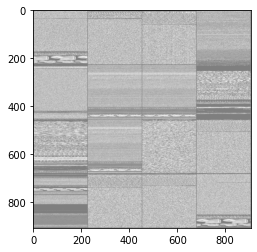

In [ ]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)

In [ ]:
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))

torch.Size([3, 454, 1810])
Fakerean Malex.gen!J Allaple.L Rbot!gen Instantaccess Yuner.A Yuner.A Lolyda.AA2 Lolyda.AA1 Yuner.A Lolyda.AA1 Allaple.A VB.AT Allaple.L Allaple.A Fakerean 


In [ ]:
device = torch.device("cuda")  # device = torch.device("cuda")

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(224*224, 1000)
        self.fc21 = nn.Linear(1000, 100)
        self.fc22 = nn.Linear(1000, 100)
        self.fc3 = nn.Linear(100, 1000)
        self.fc4 = nn.Linear(1000, 224*224)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 224*224))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar


model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)  # Exp05. Chage it 1e-5 to 1e-3
                                                     # 1e-3 is original learning rate
print(model)

VAE(
  (fc1): Linear(in_features=50176, out_features=1000, bias=True)
  (fc21): Linear(in_features=1000, out_features=100, bias=True)
  (fc22): Linear(in_features=1000, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=50176, bias=True)
)


In [ ]:
# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 224*224), reduction='sum')  # changed reduction to 'mean' 
                                                                                  # (input, target, ... reduction)

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

Epoch_Loss = {'train_epoch':[],
              'train_loss':[],
              'test_epoch':[],
              'test_loss':[]}

# Save & Loading Model for Inference
# Reference: https://pytorch.org/tutorials/beginner/saving_loading_models.html
PATH = './results_Exp06/Exp06_10-Epoch.pth'

def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    # plt.plot(train_loss / len(train_loader.dataset))
    Epoch_Loss['train_epoch'].append(epoch)
    Epoch_Loss['train_loss'].append(train_loss / len(train_loader.dataset))
    torch.save(model.state_dict(), PATH)


def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                      recon_batch.view(16, 1, 224, 224)[:n]])
                save_image(comparison.cpu(),
                         './results_Exp06/reconstruction_' + str(epoch) + '.png', nrow=n)

    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))
    # plt.plot(test_loss)
    Epoch_Loss['test_epoch'].append(epoch)
    Epoch_Loss['test_loss'].append(test_loss)

1
Train Epoch: 1 [0/7471 (0%)]	Loss: 35117.656250
Train Epoch: 1 [160/7471 (2%)]	Loss: 35601.566406
Train Epoch: 1 [320/7471 (4%)]	Loss: 36420.351562
Train Epoch: 1 [480/7471 (6%)]	Loss: 36547.398438
Train Epoch: 1 [640/7471 (9%)]	Loss: 97734.953125
Train Epoch: 1 [800/7471 (11%)]	Loss: 25029681152.000000
Train Epoch: 1 [960/7471 (13%)]	Loss: 179290.343750
Train Epoch: 1 [1120/7471 (15%)]	Loss: 6880746799104.000000
Train Epoch: 1 [1280/7471 (17%)]	Loss: 403286720512.000000
Train Epoch: 1 [1440/7471 (19%)]	Loss: 2290670370816.000000
Train Epoch: 1 [1600/7471 (21%)]	Loss: 39629979648.000000
Train Epoch: 1 [1760/7471 (24%)]	Loss: 2986116382720.000000
Train Epoch: 1 [1920/7471 (26%)]	Loss: 6605229785088.000000
Train Epoch: 1 [2080/7471 (28%)]	Loss: 61538070528.000000
Train Epoch: 1 [2240/7471 (30%)]	Loss: 4831222784.000000
Train Epoch: 1 [2400/7471 (32%)]	Loss: 697312290259322401718272.000000
Train Epoch: 1 [2560/7471 (34%)]	Loss: 108588634734592.000000
Train Epoch: 1 [2720/7471 (36%)]	Los

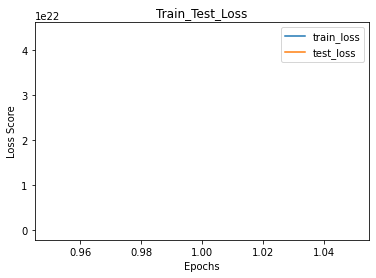

2
Train Epoch: 2 [0/7471 (0%)]	Loss: 83191.382812
Train Epoch: 2 [160/7471 (2%)]	Loss: 63806.949219
Train Epoch: 2 [320/7471 (4%)]	Loss: 54470.507812
Train Epoch: 2 [480/7471 (6%)]	Loss: 53949.953125
Train Epoch: 2 [640/7471 (9%)]	Loss: 52668.742188
Train Epoch: 2 [800/7471 (11%)]	Loss: 54387.636719
Train Epoch: 2 [960/7471 (13%)]	Loss: 53401.230469
Train Epoch: 2 [1120/7471 (15%)]	Loss: 77314.500000
Train Epoch: 2 [1280/7471 (17%)]	Loss: 68738.531250
Train Epoch: 2 [1440/7471 (19%)]	Loss: 184324.625000
Train Epoch: 2 [1600/7471 (21%)]	Loss: 1470946.250000
Train Epoch: 2 [1760/7471 (24%)]	Loss: 524757.000000
Train Epoch: 2 [1920/7471 (26%)]	Loss: 148593.625000
Train Epoch: 2 [2080/7471 (28%)]	Loss: 139642.015625
Train Epoch: 2 [2240/7471 (30%)]	Loss: 372390.531250
Train Epoch: 2 [2400/7471 (32%)]	Loss: 63296.972656
Train Epoch: 2 [2560/7471 (34%)]	Loss: 64225.707031
Train Epoch: 2 [2720/7471 (36%)]	Loss: 61662.480469
Train Epoch: 2 [2880/7471 (39%)]	Loss: 57452.824219
Train Epoch: 2 [3

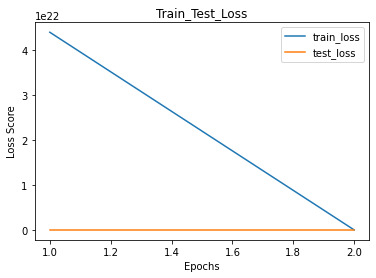

3
Train Epoch: 3 [0/7471 (0%)]	Loss: 59837.867188
Train Epoch: 3 [160/7471 (2%)]	Loss: 59337.757812
Train Epoch: 3 [320/7471 (4%)]	Loss: 58918.355469
Train Epoch: 3 [480/7471 (6%)]	Loss: 61872.320312
Train Epoch: 3 [640/7471 (9%)]	Loss: 59462.917969
Train Epoch: 3 [800/7471 (11%)]	Loss: 61786.777344
Train Epoch: 3 [960/7471 (13%)]	Loss: 61170.898438
Train Epoch: 3 [1120/7471 (15%)]	Loss: 59656.062500
Train Epoch: 3 [1280/7471 (17%)]	Loss: 61091.109375
Train Epoch: 3 [1440/7471 (19%)]	Loss: 62816.101562
Train Epoch: 3 [1600/7471 (21%)]	Loss: 60842.195312
Train Epoch: 3 [1760/7471 (24%)]	Loss: 62681.722656
Train Epoch: 3 [1920/7471 (26%)]	Loss: 60557.082031
Train Epoch: 3 [2080/7471 (28%)]	Loss: 61371.398438
Train Epoch: 3 [2240/7471 (30%)]	Loss: 62502.890625
Train Epoch: 3 [2400/7471 (32%)]	Loss: 3638084.000000
Train Epoch: 3 [2560/7471 (34%)]	Loss: 61655.320312
Train Epoch: 3 [2720/7471 (36%)]	Loss: 76345.359375
Train Epoch: 3 [2880/7471 (39%)]	Loss: 68380.359375
Train Epoch: 3 [3040/7

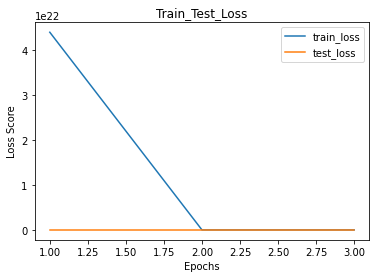

4
Train Epoch: 4 [0/7471 (0%)]	Loss: 61673.519531
Train Epoch: 4 [160/7471 (2%)]	Loss: 60562.007812
Train Epoch: 4 [320/7471 (4%)]	Loss: 59606.359375
Train Epoch: 4 [480/7471 (6%)]	Loss: 62199.726562
Train Epoch: 4 [640/7471 (9%)]	Loss: 61130.796875
Train Epoch: 4 [800/7471 (11%)]	Loss: 57883.332031
Train Epoch: 4 [960/7471 (13%)]	Loss: 62033.382812
Train Epoch: 4 [1120/7471 (15%)]	Loss: 59755.246094
Train Epoch: 4 [1280/7471 (17%)]	Loss: 60887.046875
Train Epoch: 4 [1440/7471 (19%)]	Loss: 60092.808594
Train Epoch: 4 [1600/7471 (21%)]	Loss: 60310.656250
Train Epoch: 4 [1760/7471 (24%)]	Loss: 61136.925781
Train Epoch: 4 [1920/7471 (26%)]	Loss: 60445.511719
Train Epoch: 4 [2080/7471 (28%)]	Loss: 60318.292969
Train Epoch: 4 [2240/7471 (30%)]	Loss: 165982.234375
Train Epoch: 4 [2400/7471 (32%)]	Loss: 96815.359375
Train Epoch: 4 [2560/7471 (34%)]	Loss: 69612.765625
Train Epoch: 4 [2720/7471 (36%)]	Loss: 65324.527344
Train Epoch: 4 [2880/7471 (39%)]	Loss: 62975.304688
Train Epoch: 4 [3040/74

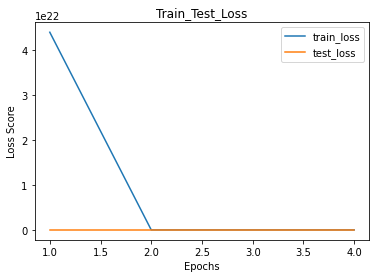

5
Train Epoch: 5 [0/7471 (0%)]	Loss: 62098.757812
Train Epoch: 5 [160/7471 (2%)]	Loss: 64206.898438
Train Epoch: 5 [320/7471 (4%)]	Loss: 61515.808594
Train Epoch: 5 [480/7471 (6%)]	Loss: 61862.531250
Train Epoch: 5 [640/7471 (9%)]	Loss: 63198.406250
Train Epoch: 5 [800/7471 (11%)]	Loss: 59500.367188
Train Epoch: 5 [960/7471 (13%)]	Loss: 61138.703125
Train Epoch: 5 [1120/7471 (15%)]	Loss: 65474.359375
Train Epoch: 5 [1280/7471 (17%)]	Loss: 62239.242188
Train Epoch: 5 [1440/7471 (19%)]	Loss: 63978.960938
Train Epoch: 5 [1600/7471 (21%)]	Loss: 61018.183594
Train Epoch: 5 [1760/7471 (24%)]	Loss: 61396.023438
Train Epoch: 5 [1920/7471 (26%)]	Loss: 61460.613281
Train Epoch: 5 [2080/7471 (28%)]	Loss: 62008.125000
Train Epoch: 5 [2240/7471 (30%)]	Loss: 61198.300781
Train Epoch: 5 [2400/7471 (32%)]	Loss: 61888.449219
Train Epoch: 5 [2560/7471 (34%)]	Loss: 63796.585938
Train Epoch: 5 [2720/7471 (36%)]	Loss: 62727.222656
Train Epoch: 5 [2880/7471 (39%)]	Loss: 63958.773438
Train Epoch: 5 [3040/747

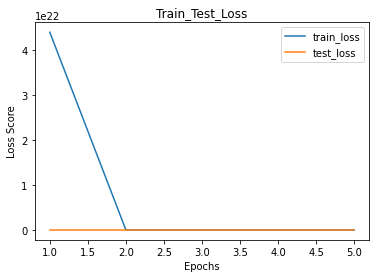

6
Train Epoch: 6 [0/7471 (0%)]	Loss: 91618.460938
Train Epoch: 6 [160/7471 (2%)]	Loss: 79345.656250
Train Epoch: 6 [320/7471 (4%)]	Loss: 66808.781250
Train Epoch: 6 [480/7471 (6%)]	Loss: 64217.160156
Train Epoch: 6 [640/7471 (9%)]	Loss: 62929.984375
Train Epoch: 6 [800/7471 (11%)]	Loss: 60102.523438
Train Epoch: 6 [960/7471 (13%)]	Loss: 64178.398438
Train Epoch: 6 [1120/7471 (15%)]	Loss: 63758.710938
Train Epoch: 6 [1280/7471 (17%)]	Loss: 67241.234375
Train Epoch: 6 [1440/7471 (19%)]	Loss: 65721.601562
Train Epoch: 6 [1600/7471 (21%)]	Loss: 62847.300781
Train Epoch: 6 [1760/7471 (24%)]	Loss: 60987.035156
Train Epoch: 6 [1920/7471 (26%)]	Loss: 59431.914062
Train Epoch: 6 [2080/7471 (28%)]	Loss: 58861.070312
Train Epoch: 6 [2240/7471 (30%)]	Loss: 64942.335938
Train Epoch: 6 [2400/7471 (32%)]	Loss: 63410.628906
Train Epoch: 6 [2560/7471 (34%)]	Loss: 61468.320312
Train Epoch: 6 [2720/7471 (36%)]	Loss: 63242.039062
Train Epoch: 6 [2880/7471 (39%)]	Loss: 72088.343750
Train Epoch: 6 [3040/747

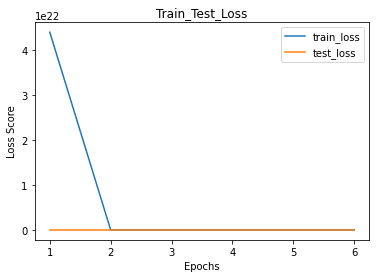

7
Train Epoch: 7 [0/7471 (0%)]	Loss: 62988.632812
Train Epoch: 7 [160/7471 (2%)]	Loss: 60482.492188
Train Epoch: 7 [320/7471 (4%)]	Loss: 65126.359375
Train Epoch: 7 [480/7471 (6%)]	Loss: 60661.906250
Train Epoch: 7 [640/7471 (9%)]	Loss: 62241.492188
Train Epoch: 7 [800/7471 (11%)]	Loss: 61877.652344
Train Epoch: 7 [960/7471 (13%)]	Loss: 61236.683594
Train Epoch: 7 [1120/7471 (15%)]	Loss: 61750.468750
Train Epoch: 7 [1280/7471 (17%)]	Loss: 58973.250000
Train Epoch: 7 [1440/7471 (19%)]	Loss: 61694.953125
Train Epoch: 7 [1600/7471 (21%)]	Loss: 63004.968750
Train Epoch: 7 [1760/7471 (24%)]	Loss: 63368.812500
Train Epoch: 7 [1920/7471 (26%)]	Loss: 63133.113281
Train Epoch: 7 [2080/7471 (28%)]	Loss: 62081.000000
Train Epoch: 7 [2240/7471 (30%)]	Loss: 62734.246094
Train Epoch: 7 [2400/7471 (32%)]	Loss: 62173.402344
Train Epoch: 7 [2560/7471 (34%)]	Loss: 59756.250000
Train Epoch: 7 [2720/7471 (36%)]	Loss: 61429.937500
Train Epoch: 7 [2880/7471 (39%)]	Loss: 60799.363281
Train Epoch: 7 [3040/747

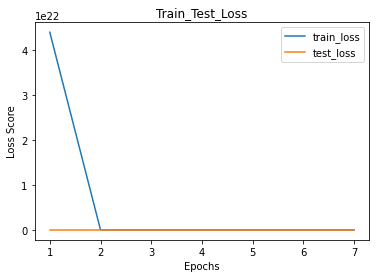

8
Train Epoch: 8 [0/7471 (0%)]	Loss: 62128.425781
Train Epoch: 8 [160/7471 (2%)]	Loss: 62081.648438
Train Epoch: 8 [320/7471 (4%)]	Loss: 61971.804688
Train Epoch: 8 [480/7471 (6%)]	Loss: 62460.890625
Train Epoch: 8 [640/7471 (9%)]	Loss: 61233.933594
Train Epoch: 8 [800/7471 (11%)]	Loss: 62581.917969
Train Epoch: 8 [960/7471 (13%)]	Loss: 64286.992188
Train Epoch: 8 [1120/7471 (15%)]	Loss: 64794.937500
Train Epoch: 8 [1280/7471 (17%)]	Loss: 58920.082031
Train Epoch: 8 [1440/7471 (19%)]	Loss: 61700.023438
Train Epoch: 8 [1600/7471 (21%)]	Loss: 61420.253906
Train Epoch: 8 [1760/7471 (24%)]	Loss: 58779.902344
Train Epoch: 8 [1920/7471 (26%)]	Loss: 62024.386719
Train Epoch: 8 [2080/7471 (28%)]	Loss: 60430.175781
Train Epoch: 8 [2240/7471 (30%)]	Loss: 62033.437500
Train Epoch: 8 [2400/7471 (32%)]	Loss: 60737.121094
Train Epoch: 8 [2560/7471 (34%)]	Loss: 62350.164062
Train Epoch: 8 [2720/7471 (36%)]	Loss: 61017.179688
Train Epoch: 8 [2880/7471 (39%)]	Loss: 63338.730469
Train Epoch: 8 [3040/747

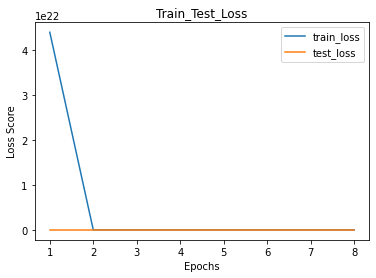

9
Train Epoch: 9 [0/7471 (0%)]	Loss: 93591.640625
Train Epoch: 9 [160/7471 (2%)]	Loss: 98498.296875
Train Epoch: 9 [320/7471 (4%)]	Loss: 284881.656250
Train Epoch: 9 [480/7471 (6%)]	Loss: 88295.328125
Train Epoch: 9 [640/7471 (9%)]	Loss: 101771.109375
Train Epoch: 9 [800/7471 (11%)]	Loss: 119028.484375
Train Epoch: 9 [960/7471 (13%)]	Loss: 67230.507812
Train Epoch: 9 [1120/7471 (15%)]	Loss: 66116.218750
Train Epoch: 9 [1280/7471 (17%)]	Loss: 63064.875000
Train Epoch: 9 [1440/7471 (19%)]	Loss: 62727.289062
Train Epoch: 9 [1600/7471 (21%)]	Loss: 61237.039062
Train Epoch: 9 [1760/7471 (24%)]	Loss: 60327.515625
Train Epoch: 9 [1920/7471 (26%)]	Loss: 61656.351562
Train Epoch: 9 [2080/7471 (28%)]	Loss: 62456.218750
Train Epoch: 9 [2240/7471 (30%)]	Loss: 57426.046875
Train Epoch: 9 [2400/7471 (32%)]	Loss: 64278.281250
Train Epoch: 9 [2560/7471 (34%)]	Loss: 62832.753906
Train Epoch: 9 [2720/7471 (36%)]	Loss: 62948.425781
Train Epoch: 9 [2880/7471 (39%)]	Loss: 60902.812500
Train Epoch: 9 [3040/

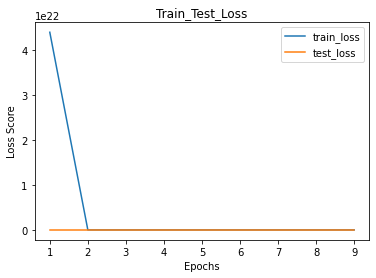

10
Train Epoch: 10 [0/7471 (0%)]	Loss: 62837.593750
Train Epoch: 10 [160/7471 (2%)]	Loss: 63797.937500
Train Epoch: 10 [320/7471 (4%)]	Loss: 63873.191406
Train Epoch: 10 [480/7471 (6%)]	Loss: 61436.480469
Train Epoch: 10 [640/7471 (9%)]	Loss: 63567.027344
Train Epoch: 10 [800/7471 (11%)]	Loss: 61687.335938
Train Epoch: 10 [960/7471 (13%)]	Loss: 62475.488281
Train Epoch: 10 [1120/7471 (15%)]	Loss: 64368.851562
Train Epoch: 10 [1280/7471 (17%)]	Loss: 63158.445312
Train Epoch: 10 [1440/7471 (19%)]	Loss: 61381.015625
Train Epoch: 10 [1600/7471 (21%)]	Loss: 59566.089844
Train Epoch: 10 [1760/7471 (24%)]	Loss: 63318.484375
Train Epoch: 10 [1920/7471 (26%)]	Loss: 62608.906250
Train Epoch: 10 [2080/7471 (28%)]	Loss: 63199.152344
Train Epoch: 10 [2240/7471 (30%)]	Loss: 60264.640625
Train Epoch: 10 [2400/7471 (32%)]	Loss: 62135.867188
Train Epoch: 10 [2560/7471 (34%)]	Loss: 65474.722656
Train Epoch: 10 [2720/7471 (36%)]	Loss: 61947.484375
Train Epoch: 10 [2880/7471 (39%)]	Loss: 60848.796875
Trai

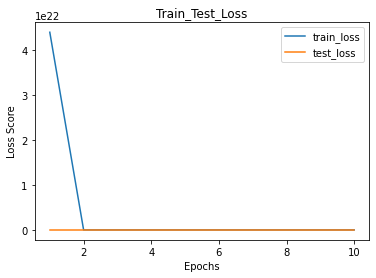

11
Train Epoch: 11 [0/7471 (0%)]	Loss: 62397.082031
Train Epoch: 11 [160/7471 (2%)]	Loss: 64248.808594
Train Epoch: 11 [320/7471 (4%)]	Loss: 67064.414062
Train Epoch: 11 [480/7471 (6%)]	Loss: 64137.250000
Train Epoch: 11 [640/7471 (9%)]	Loss: 62905.390625
Train Epoch: 11 [800/7471 (11%)]	Loss: 64900.535156
Train Epoch: 11 [960/7471 (13%)]	Loss: 65360.484375
Train Epoch: 11 [1120/7471 (15%)]	Loss: 64009.320312
Train Epoch: 11 [1280/7471 (17%)]	Loss: 64944.117188
Train Epoch: 11 [1440/7471 (19%)]	Loss: 63277.421875
Train Epoch: 11 [1600/7471 (21%)]	Loss: 62221.199219
Train Epoch: 11 [1760/7471 (24%)]	Loss: 64765.546875
Train Epoch: 11 [1920/7471 (26%)]	Loss: 63762.863281
Train Epoch: 11 [2080/7471 (28%)]	Loss: 63674.375000
Train Epoch: 11 [2240/7471 (30%)]	Loss: 64480.085938
Train Epoch: 11 [2400/7471 (32%)]	Loss: 64171.730469
Train Epoch: 11 [2560/7471 (34%)]	Loss: 63490.789062
Train Epoch: 11 [2720/7471 (36%)]	Loss: 63131.285156
Train Epoch: 11 [2880/7471 (39%)]	Loss: 62283.738281
Trai

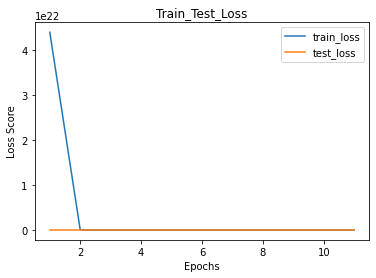

12
Train Epoch: 12 [0/7471 (0%)]	Loss: 60077.960938
Train Epoch: 12 [160/7471 (2%)]	Loss: 64795.726562
Train Epoch: 12 [320/7471 (4%)]	Loss: 62441.839844
Train Epoch: 12 [480/7471 (6%)]	Loss: 64124.007812
Train Epoch: 12 [640/7471 (9%)]	Loss: 61253.492188
Train Epoch: 12 [800/7471 (11%)]	Loss: 65297.542969
Train Epoch: 12 [960/7471 (13%)]	Loss: 67537.382812
Train Epoch: 12 [1120/7471 (15%)]	Loss: 65417.113281
Train Epoch: 12 [1280/7471 (17%)]	Loss: 64588.597656
Train Epoch: 12 [1440/7471 (19%)]	Loss: 62019.621094
Train Epoch: 12 [1600/7471 (21%)]	Loss: 60875.117188
Train Epoch: 12 [1760/7471 (24%)]	Loss: 63336.050781
Train Epoch: 12 [1920/7471 (26%)]	Loss: 63401.015625
Train Epoch: 12 [2080/7471 (28%)]	Loss: 63646.523438
Train Epoch: 12 [2240/7471 (30%)]	Loss: 61361.312500
Train Epoch: 12 [2400/7471 (32%)]	Loss: 78906.328125
Train Epoch: 12 [2560/7471 (34%)]	Loss: 65877.328125
Train Epoch: 12 [2720/7471 (36%)]	Loss: 107753.750000
Train Epoch: 12 [2880/7471 (39%)]	Loss: 73656.765625
Tra

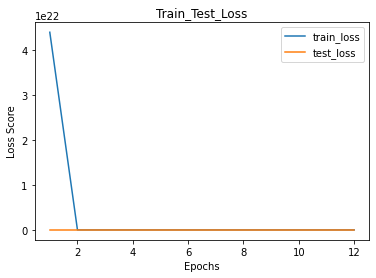

13
Train Epoch: 13 [0/7471 (0%)]	Loss: 64080.542969
Train Epoch: 13 [160/7471 (2%)]	Loss: 61496.843750
Train Epoch: 13 [320/7471 (4%)]	Loss: 61576.945312
Train Epoch: 13 [480/7471 (6%)]	Loss: 63092.785156
Train Epoch: 13 [640/7471 (9%)]	Loss: 61663.472656
Train Epoch: 13 [800/7471 (11%)]	Loss: 64103.945312
Train Epoch: 13 [960/7471 (13%)]	Loss: 63552.117188
Train Epoch: 13 [1120/7471 (15%)]	Loss: 62157.750000
Train Epoch: 13 [1280/7471 (17%)]	Loss: 62716.296875
Train Epoch: 13 [1440/7471 (19%)]	Loss: 64307.460938
Train Epoch: 13 [1600/7471 (21%)]	Loss: 66136.890625
Train Epoch: 13 [1760/7471 (24%)]	Loss: 62995.085938
Train Epoch: 13 [1920/7471 (26%)]	Loss: 62885.589844
Train Epoch: 13 [2080/7471 (28%)]	Loss: 64485.378906
Train Epoch: 13 [2240/7471 (30%)]	Loss: 67836.125000
Train Epoch: 13 [2400/7471 (32%)]	Loss: 63987.218750
Train Epoch: 13 [2560/7471 (34%)]	Loss: 67770.578125
Train Epoch: 13 [2720/7471 (36%)]	Loss: 61403.156250
Train Epoch: 13 [2880/7471 (39%)]	Loss: 63055.570312
Trai

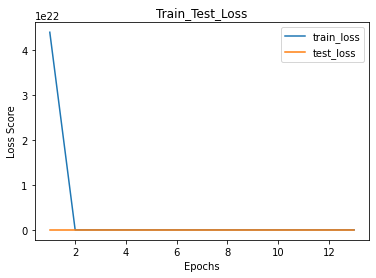

14
Train Epoch: 14 [0/7471 (0%)]	Loss: 69707.515625
Train Epoch: 14 [160/7471 (2%)]	Loss: 66848.531250
Train Epoch: 14 [320/7471 (4%)]	Loss: 66568.437500
Train Epoch: 14 [480/7471 (6%)]	Loss: 66758.046875
Train Epoch: 14 [640/7471 (9%)]	Loss: 68329.101562
Train Epoch: 14 [800/7471 (11%)]	Loss: 65415.289062
Train Epoch: 14 [960/7471 (13%)]	Loss: 69070.085938
Train Epoch: 14 [1120/7471 (15%)]	Loss: 66356.562500
Train Epoch: 14 [1280/7471 (17%)]	Loss: 64673.632812
Train Epoch: 14 [1440/7471 (19%)]	Loss: 65676.265625
Train Epoch: 14 [1600/7471 (21%)]	Loss: 62801.660156
Train Epoch: 14 [1760/7471 (24%)]	Loss: 65424.625000
Train Epoch: 14 [1920/7471 (26%)]	Loss: 62536.019531
Train Epoch: 14 [2080/7471 (28%)]	Loss: 65233.777344
Train Epoch: 14 [2240/7471 (30%)]	Loss: 64989.093750
Train Epoch: 14 [2400/7471 (32%)]	Loss: 64938.484375
Train Epoch: 14 [2560/7471 (34%)]	Loss: 65445.351562
Train Epoch: 14 [2720/7471 (36%)]	Loss: 63481.929688
Train Epoch: 14 [2880/7471 (39%)]	Loss: 64682.699219
Trai

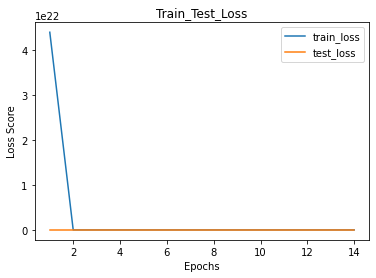

15
Train Epoch: 15 [0/7471 (0%)]	Loss: 64848.937500
Train Epoch: 15 [160/7471 (2%)]	Loss: 66109.984375
Train Epoch: 15 [320/7471 (4%)]	Loss: 65650.640625
Train Epoch: 15 [480/7471 (6%)]	Loss: 64821.687500
Train Epoch: 15 [640/7471 (9%)]	Loss: 73747.781250
Train Epoch: 15 [800/7471 (11%)]	Loss: 67608.015625
Train Epoch: 15 [960/7471 (13%)]	Loss: 313941.343750
Train Epoch: 15 [1120/7471 (15%)]	Loss: 182896.453125
Train Epoch: 15 [1280/7471 (17%)]	Loss: 230724.031250
Train Epoch: 15 [1440/7471 (19%)]	Loss: 1065587.750000
Train Epoch: 15 [1600/7471 (21%)]	Loss: 356188.437500
Train Epoch: 15 [1760/7471 (24%)]	Loss: 158407.093750
Train Epoch: 15 [1920/7471 (26%)]	Loss: 99046.593750
Train Epoch: 15 [2080/7471 (28%)]	Loss: 79332.156250
Train Epoch: 15 [2240/7471 (30%)]	Loss: 71849.695312
Train Epoch: 15 [2400/7471 (32%)]	Loss: 64697.753906
Train Epoch: 15 [2560/7471 (34%)]	Loss: 67002.531250
Train Epoch: 15 [2720/7471 (36%)]	Loss: 63640.421875
Train Epoch: 15 [2880/7471 (39%)]	Loss: 65949.7031

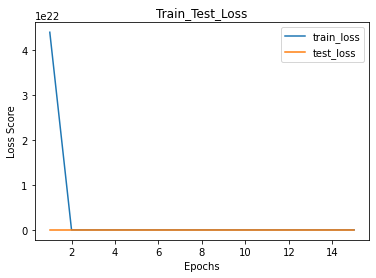

16
Train Epoch: 16 [0/7471 (0%)]	Loss: 60755.539062
Train Epoch: 16 [160/7471 (2%)]	Loss: 60858.304688
Train Epoch: 16 [320/7471 (4%)]	Loss: 61588.968750
Train Epoch: 16 [480/7471 (6%)]	Loss: 61732.039062
Train Epoch: 16 [640/7471 (9%)]	Loss: 61674.773438
Train Epoch: 16 [800/7471 (11%)]	Loss: 62033.617188
Train Epoch: 16 [960/7471 (13%)]	Loss: 63391.238281
Train Epoch: 16 [1120/7471 (15%)]	Loss: 61222.375000
Train Epoch: 16 [1280/7471 (17%)]	Loss: 61766.500000
Train Epoch: 16 [1440/7471 (19%)]	Loss: 63071.429688
Train Epoch: 16 [1600/7471 (21%)]	Loss: 66098.726562
Train Epoch: 16 [1760/7471 (24%)]	Loss: 63698.046875
Train Epoch: 16 [1920/7471 (26%)]	Loss: 62564.101562
Train Epoch: 16 [2080/7471 (28%)]	Loss: 70305.593750
Train Epoch: 16 [2240/7471 (30%)]	Loss: 65809.453125
Train Epoch: 16 [2400/7471 (32%)]	Loss: 122827.203125
Train Epoch: 16 [2560/7471 (34%)]	Loss: 97522.429688
Train Epoch: 16 [2720/7471 (36%)]	Loss: 67591.398438
Train Epoch: 16 [2880/7471 (39%)]	Loss: 66691.210938
Tra

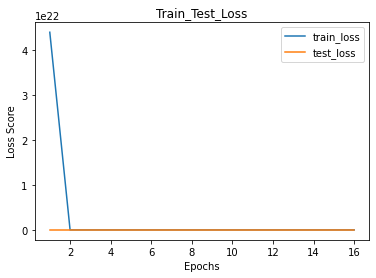

17
Train Epoch: 17 [0/7471 (0%)]	Loss: 83065.250000
Train Epoch: 17 [160/7471 (2%)]	Loss: 69405.843750
Train Epoch: 17 [320/7471 (4%)]	Loss: 64791.007812
Train Epoch: 17 [480/7471 (6%)]	Loss: 62869.226562
Train Epoch: 17 [640/7471 (9%)]	Loss: 63536.917969
Train Epoch: 17 [800/7471 (11%)]	Loss: 60665.062500
Train Epoch: 17 [960/7471 (13%)]	Loss: 63283.890625
Train Epoch: 17 [1120/7471 (15%)]	Loss: 68622.468750
Train Epoch: 17 [1280/7471 (17%)]	Loss: 63257.703125
Train Epoch: 17 [1440/7471 (19%)]	Loss: 62040.914062
Train Epoch: 17 [1600/7471 (21%)]	Loss: 63218.949219
Train Epoch: 17 [1760/7471 (24%)]	Loss: 81062.156250
Train Epoch: 17 [1920/7471 (26%)]	Loss: 66249.421875
Train Epoch: 17 [2080/7471 (28%)]	Loss: 67675.828125
Train Epoch: 17 [2240/7471 (30%)]	Loss: 65130.742188
Train Epoch: 17 [2400/7471 (32%)]	Loss: 64446.742188
Train Epoch: 17 [2560/7471 (34%)]	Loss: 66827.625000
Train Epoch: 17 [2720/7471 (36%)]	Loss: 63724.894531
Train Epoch: 17 [2880/7471 (39%)]	Loss: 116449.835938
Tra

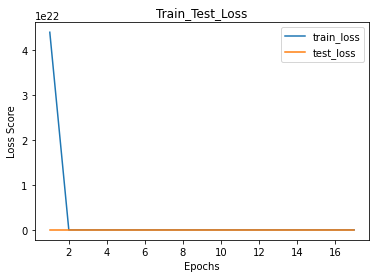

18
Train Epoch: 18 [0/7471 (0%)]	Loss: 65283.863281
Train Epoch: 18 [160/7471 (2%)]	Loss: 62286.648438
Train Epoch: 18 [320/7471 (4%)]	Loss: 65493.832031
Train Epoch: 18 [480/7471 (6%)]	Loss: 66418.179688
Train Epoch: 18 [640/7471 (9%)]	Loss: 63149.187500
Train Epoch: 18 [800/7471 (11%)]	Loss: 65087.578125
Train Epoch: 18 [960/7471 (13%)]	Loss: 69453.867188
Train Epoch: 18 [1120/7471 (15%)]	Loss: 64154.292969
Train Epoch: 18 [1280/7471 (17%)]	Loss: 66811.390625
Train Epoch: 18 [1440/7471 (19%)]	Loss: 65801.132812
Train Epoch: 18 [1600/7471 (21%)]	Loss: 64100.269531
Train Epoch: 18 [1760/7471 (24%)]	Loss: 62787.042969
Train Epoch: 18 [1920/7471 (26%)]	Loss: 65123.214844
Train Epoch: 18 [2080/7471 (28%)]	Loss: 65092.984375
Train Epoch: 18 [2240/7471 (30%)]	Loss: 66433.273438
Train Epoch: 18 [2400/7471 (32%)]	Loss: 62004.835938
Train Epoch: 18 [2560/7471 (34%)]	Loss: 66201.953125
Train Epoch: 18 [2720/7471 (36%)]	Loss: 66589.640625
Train Epoch: 18 [2880/7471 (39%)]	Loss: 61569.062500
Trai

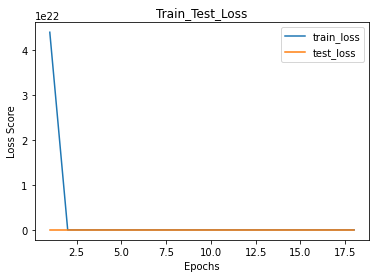

19
Train Epoch: 19 [0/7471 (0%)]	Loss: 64548.601562
Train Epoch: 19 [160/7471 (2%)]	Loss: 61895.078125
Train Epoch: 19 [320/7471 (4%)]	Loss: 64391.464844
Train Epoch: 19 [480/7471 (6%)]	Loss: 66811.968750
Train Epoch: 19 [640/7471 (9%)]	Loss: 66959.546875
Train Epoch: 19 [800/7471 (11%)]	Loss: 63828.867188
Train Epoch: 19 [960/7471 (13%)]	Loss: 65589.250000
Train Epoch: 19 [1120/7471 (15%)]	Loss: 77882.250000
Train Epoch: 19 [1280/7471 (17%)]	Loss: 67033.914062
Train Epoch: 19 [1440/7471 (19%)]	Loss: 62915.093750
Train Epoch: 19 [1600/7471 (21%)]	Loss: 66155.593750
Train Epoch: 19 [1760/7471 (24%)]	Loss: 60762.171875
Train Epoch: 19 [1920/7471 (26%)]	Loss: 63487.585938
Train Epoch: 19 [2080/7471 (28%)]	Loss: 60733.945312
Train Epoch: 19 [2240/7471 (30%)]	Loss: 61944.519531
Train Epoch: 19 [2400/7471 (32%)]	Loss: 61633.390625
Train Epoch: 19 [2560/7471 (34%)]	Loss: 64281.359375
Train Epoch: 19 [2720/7471 (36%)]	Loss: 65413.109375
Train Epoch: 19 [2880/7471 (39%)]	Loss: 64880.335938
Trai

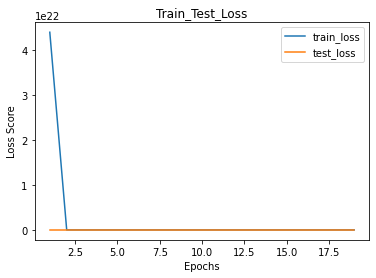

20
Train Epoch: 20 [0/7471 (0%)]	Loss: 64962.531250
Train Epoch: 20 [160/7471 (2%)]	Loss: 66257.093750
Train Epoch: 20 [320/7471 (4%)]	Loss: 67256.132812
Train Epoch: 20 [480/7471 (6%)]	Loss: 70646.578125
Train Epoch: 20 [640/7471 (9%)]	Loss: 83190.234375
Train Epoch: 20 [800/7471 (11%)]	Loss: 109910.242188
Train Epoch: 20 [960/7471 (13%)]	Loss: 84588.031250
Train Epoch: 20 [1120/7471 (15%)]	Loss: 100244.265625
Train Epoch: 20 [1280/7471 (17%)]	Loss: 74894.265625
Train Epoch: 20 [1440/7471 (19%)]	Loss: 110201.406250
Train Epoch: 20 [1600/7471 (21%)]	Loss: 76239.718750
Train Epoch: 20 [1760/7471 (24%)]	Loss: 70327.164062
Train Epoch: 20 [1920/7471 (26%)]	Loss: 75431.218750
Train Epoch: 20 [2080/7471 (28%)]	Loss: 77487.609375
Train Epoch: 20 [2240/7471 (30%)]	Loss: 66948.734375
Train Epoch: 20 [2400/7471 (32%)]	Loss: 69661.710938
Train Epoch: 20 [2560/7471 (34%)]	Loss: 68137.218750
Train Epoch: 20 [2720/7471 (36%)]	Loss: 64734.851562
Train Epoch: 20 [2880/7471 (39%)]	Loss: 69355.359375
T

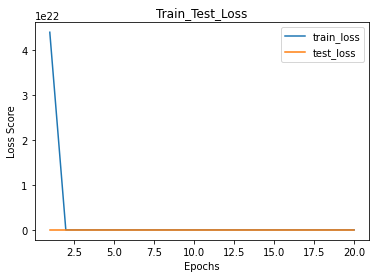

21
Train Epoch: 21 [0/7471 (0%)]	Loss: 65021.507812
Train Epoch: 21 [160/7471 (2%)]	Loss: 202175.468750
Train Epoch: 21 [320/7471 (4%)]	Loss: 109901.164062
Train Epoch: 21 [480/7471 (6%)]	Loss: 79399.851562
Train Epoch: 21 [640/7471 (9%)]	Loss: 72406.265625
Train Epoch: 21 [800/7471 (11%)]	Loss: 66756.296875
Train Epoch: 21 [960/7471 (13%)]	Loss: 147814.078125
Train Epoch: 21 [1120/7471 (15%)]	Loss: 65225.601562
Train Epoch: 21 [1280/7471 (17%)]	Loss: 63499.714844
Train Epoch: 21 [1440/7471 (19%)]	Loss: 63330.667969
Train Epoch: 21 [1600/7471 (21%)]	Loss: 65927.429688
Train Epoch: 21 [1760/7471 (24%)]	Loss: 66609.195312
Train Epoch: 21 [1920/7471 (26%)]	Loss: 62551.710938
Train Epoch: 21 [2080/7471 (28%)]	Loss: 63909.132812
Train Epoch: 21 [2240/7471 (30%)]	Loss: 64331.457031
Train Epoch: 21 [2400/7471 (32%)]	Loss: 65872.171875
Train Epoch: 21 [2560/7471 (34%)]	Loss: 67443.718750
Train Epoch: 21 [2720/7471 (36%)]	Loss: 61554.773438
Train Epoch: 21 [2880/7471 (39%)]	Loss: 62850.726562
T

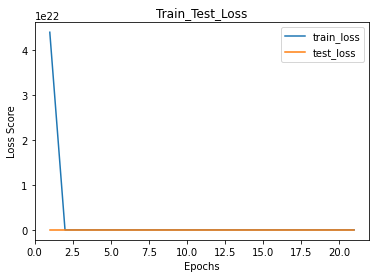

22
Train Epoch: 22 [0/7471 (0%)]	Loss: 61322.335938
Train Epoch: 22 [160/7471 (2%)]	Loss: 66404.921875
Train Epoch: 22 [320/7471 (4%)]	Loss: 64943.605469
Train Epoch: 22 [480/7471 (6%)]	Loss: 61104.445312
Train Epoch: 22 [640/7471 (9%)]	Loss: 72729.500000
Train Epoch: 22 [800/7471 (11%)]	Loss: 64923.171875
Train Epoch: 22 [960/7471 (13%)]	Loss: 73318.843750
Train Epoch: 22 [1120/7471 (15%)]	Loss: 69483.562500
Train Epoch: 22 [1280/7471 (17%)]	Loss: 67000.281250
Train Epoch: 22 [1440/7471 (19%)]	Loss: 65535.617188
Train Epoch: 22 [1600/7471 (21%)]	Loss: 67684.937500
Train Epoch: 22 [1760/7471 (24%)]	Loss: 64498.308594
Train Epoch: 22 [1920/7471 (26%)]	Loss: 64467.687500
Train Epoch: 22 [2080/7471 (28%)]	Loss: 90940.796875
Train Epoch: 22 [2240/7471 (30%)]	Loss: 67349.859375
Train Epoch: 22 [2400/7471 (32%)]	Loss: 70047.851562
Train Epoch: 22 [2560/7471 (34%)]	Loss: 98516.015625
Train Epoch: 22 [2720/7471 (36%)]	Loss: 88562.062500
Train Epoch: 22 [2880/7471 (39%)]	Loss: 68794.453125
Trai

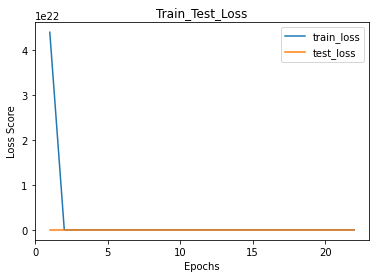

23
Train Epoch: 23 [0/7471 (0%)]	Loss: 65706.562500
Train Epoch: 23 [160/7471 (2%)]	Loss: 63106.343750
Train Epoch: 23 [320/7471 (4%)]	Loss: 64146.324219
Train Epoch: 23 [480/7471 (6%)]	Loss: 64961.027344
Train Epoch: 23 [640/7471 (9%)]	Loss: 63767.003906
Train Epoch: 23 [800/7471 (11%)]	Loss: 62123.679688
Train Epoch: 23 [960/7471 (13%)]	Loss: 59781.210938
Train Epoch: 23 [1120/7471 (15%)]	Loss: 67136.890625
Train Epoch: 23 [1280/7471 (17%)]	Loss: 64673.515625
Train Epoch: 23 [1440/7471 (19%)]	Loss: 63451.011719
Train Epoch: 23 [1600/7471 (21%)]	Loss: 352725.750000
Train Epoch: 23 [1760/7471 (24%)]	Loss: 215097.937500
Train Epoch: 23 [1920/7471 (26%)]	Loss: 91343.546875
Train Epoch: 23 [2080/7471 (28%)]	Loss: 74494.742188
Train Epoch: 23 [2240/7471 (30%)]	Loss: 66996.421875
Train Epoch: 23 [2400/7471 (32%)]	Loss: 65006.007812
Train Epoch: 23 [2560/7471 (34%)]	Loss: 82981.000000
Train Epoch: 23 [2720/7471 (36%)]	Loss: 71581.335938
Train Epoch: 23 [2880/7471 (39%)]	Loss: 1657118.125000


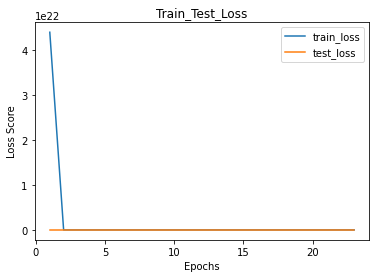

24
Train Epoch: 24 [0/7471 (0%)]	Loss: 67362.312500
Train Epoch: 24 [160/7471 (2%)]	Loss: 66335.109375
Train Epoch: 24 [320/7471 (4%)]	Loss: 65094.179688
Train Epoch: 24 [480/7471 (6%)]	Loss: 136815.078125
Train Epoch: 24 [640/7471 (9%)]	Loss: 65277.625000
Train Epoch: 24 [800/7471 (11%)]	Loss: 64633.117188
Train Epoch: 24 [960/7471 (13%)]	Loss: 63674.453125
Train Epoch: 24 [1120/7471 (15%)]	Loss: 62855.828125
Train Epoch: 24 [1280/7471 (17%)]	Loss: 73808.351562
Train Epoch: 24 [1440/7471 (19%)]	Loss: 67336.453125
Train Epoch: 24 [1600/7471 (21%)]	Loss: 64613.273438
Train Epoch: 24 [1760/7471 (24%)]	Loss: 65992.281250
Train Epoch: 24 [1920/7471 (26%)]	Loss: 62299.480469
Train Epoch: 24 [2080/7471 (28%)]	Loss: 65947.781250
Train Epoch: 24 [2240/7471 (30%)]	Loss: 64384.046875
Train Epoch: 24 [2400/7471 (32%)]	Loss: 63428.132812
Train Epoch: 24 [2560/7471 (34%)]	Loss: 65900.765625
Train Epoch: 24 [2720/7471 (36%)]	Loss: 64166.304688
Train Epoch: 24 [2880/7471 (39%)]	Loss: 89514.296875
Tra

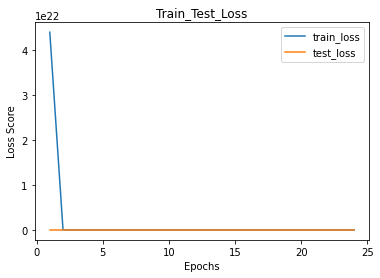

25
Train Epoch: 25 [0/7471 (0%)]	Loss: 81599.781250
Train Epoch: 25 [160/7471 (2%)]	Loss: 69128.859375
Train Epoch: 25 [320/7471 (4%)]	Loss: 147365.968750
Train Epoch: 25 [480/7471 (6%)]	Loss: 90697.414062
Train Epoch: 25 [640/7471 (9%)]	Loss: 70844.031250
Train Epoch: 25 [800/7471 (11%)]	Loss: 81083.671875
Train Epoch: 25 [960/7471 (13%)]	Loss: 69490.039062
Train Epoch: 25 [1120/7471 (15%)]	Loss: 70348.015625
Train Epoch: 25 [1280/7471 (17%)]	Loss: 68265.804688
Train Epoch: 25 [1440/7471 (19%)]	Loss: 69192.742188
Train Epoch: 25 [1600/7471 (21%)]	Loss: 66482.781250
Train Epoch: 25 [1760/7471 (24%)]	Loss: 67335.484375
Train Epoch: 25 [1920/7471 (26%)]	Loss: 68130.921875
Train Epoch: 25 [2080/7471 (28%)]	Loss: 65336.445312
Train Epoch: 25 [2240/7471 (30%)]	Loss: 65646.523438
Train Epoch: 25 [2400/7471 (32%)]	Loss: 66812.453125
Train Epoch: 25 [2560/7471 (34%)]	Loss: 67629.953125
Train Epoch: 25 [2720/7471 (36%)]	Loss: 69344.484375
Train Epoch: 25 [2880/7471 (39%)]	Loss: 67592.093750
Tra

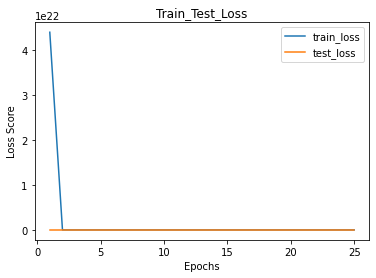

26
Train Epoch: 26 [0/7471 (0%)]	Loss: 69783.796875
Train Epoch: 26 [160/7471 (2%)]	Loss: 68027.765625
Train Epoch: 26 [320/7471 (4%)]	Loss: 84692.523438
Train Epoch: 26 [480/7471 (6%)]	Loss: 73922.078125
Train Epoch: 26 [640/7471 (9%)]	Loss: 70941.421875
Train Epoch: 26 [800/7471 (11%)]	Loss: 68767.609375
Train Epoch: 26 [960/7471 (13%)]	Loss: 69050.500000
Train Epoch: 26 [1120/7471 (15%)]	Loss: 64165.175781
Train Epoch: 26 [1280/7471 (17%)]	Loss: 64151.199219
Train Epoch: 26 [1440/7471 (19%)]	Loss: 67356.382812
Train Epoch: 26 [1600/7471 (21%)]	Loss: 63313.960938
Train Epoch: 26 [1760/7471 (24%)]	Loss: 62066.523438
Train Epoch: 26 [1920/7471 (26%)]	Loss: 59418.722656
Train Epoch: 26 [2080/7471 (28%)]	Loss: 65748.546875
Train Epoch: 26 [2240/7471 (30%)]	Loss: 70460.875000
Train Epoch: 26 [2400/7471 (32%)]	Loss: 80047.390625
Train Epoch: 26 [2560/7471 (34%)]	Loss: 73094.515625
Train Epoch: 26 [2720/7471 (36%)]	Loss: 72684.500000
Train Epoch: 26 [2880/7471 (39%)]	Loss: 69163.304688
Trai

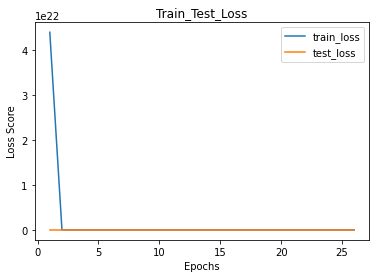

27
Train Epoch: 27 [0/7471 (0%)]	Loss: 64440.878906
Train Epoch: 27 [160/7471 (2%)]	Loss: 66609.609375
Train Epoch: 27 [320/7471 (4%)]	Loss: 67994.015625
Train Epoch: 27 [480/7471 (6%)]	Loss: 64939.394531
Train Epoch: 27 [640/7471 (9%)]	Loss: 64087.570312
Train Epoch: 27 [800/7471 (11%)]	Loss: 65990.812500
Train Epoch: 27 [960/7471 (13%)]	Loss: 65717.750000
Train Epoch: 27 [1120/7471 (15%)]	Loss: 72247.515625
Train Epoch: 27 [1280/7471 (17%)]	Loss: 68523.773438
Train Epoch: 27 [1440/7471 (19%)]	Loss: 62829.375000
Train Epoch: 27 [1600/7471 (21%)]	Loss: 67664.664062
Train Epoch: 27 [1760/7471 (24%)]	Loss: 63773.386719
Train Epoch: 27 [1920/7471 (26%)]	Loss: 62362.355469
Train Epoch: 27 [2080/7471 (28%)]	Loss: 67043.835938
Train Epoch: 27 [2240/7471 (30%)]	Loss: 65899.906250
Train Epoch: 27 [2400/7471 (32%)]	Loss: 66052.726562
Train Epoch: 27 [2560/7471 (34%)]	Loss: 68968.664062
Train Epoch: 27 [2720/7471 (36%)]	Loss: 66610.601562
Train Epoch: 27 [2880/7471 (39%)]	Loss: 67539.484375
Trai

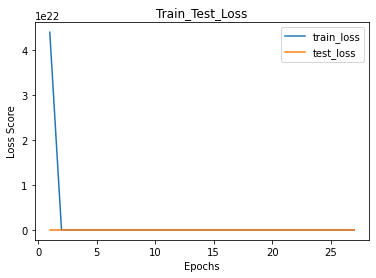

28
Train Epoch: 28 [0/7471 (0%)]	Loss: 66745.250000
Train Epoch: 28 [160/7471 (2%)]	Loss: 66230.390625
Train Epoch: 28 [320/7471 (4%)]	Loss: 66463.375000
Train Epoch: 28 [480/7471 (6%)]	Loss: 65911.914062
Train Epoch: 28 [640/7471 (9%)]	Loss: 67553.578125
Train Epoch: 28 [800/7471 (11%)]	Loss: 94780.851562
Train Epoch: 28 [960/7471 (13%)]	Loss: 80287.937500
Train Epoch: 28 [1120/7471 (15%)]	Loss: 83318.937500
Train Epoch: 28 [1280/7471 (17%)]	Loss: 373574.500000
Train Epoch: 28 [1440/7471 (19%)]	Loss: 133772.734375
Train Epoch: 28 [1600/7471 (21%)]	Loss: 95962.718750
Train Epoch: 28 [1760/7471 (24%)]	Loss: 78339.179688
Train Epoch: 28 [1920/7471 (26%)]	Loss: 70187.851562
Train Epoch: 28 [2080/7471 (28%)]	Loss: 69123.390625
Train Epoch: 28 [2240/7471 (30%)]	Loss: 68176.015625
Train Epoch: 28 [2400/7471 (32%)]	Loss: 64144.500000
Train Epoch: 28 [2560/7471 (34%)]	Loss: 65568.125000
Train Epoch: 28 [2720/7471 (36%)]	Loss: 65973.343750
Train Epoch: 28 [2880/7471 (39%)]	Loss: 64541.171875
Tr

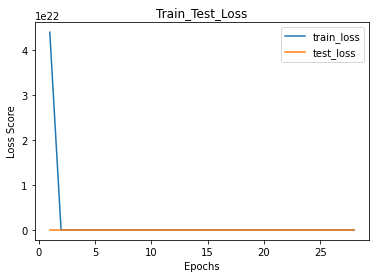

29
Train Epoch: 29 [0/7471 (0%)]	Loss: 70086.960938
Train Epoch: 29 [160/7471 (2%)]	Loss: 68670.289062
Train Epoch: 29 [320/7471 (4%)]	Loss: 68091.976562
Train Epoch: 29 [480/7471 (6%)]	Loss: 69768.609375
Train Epoch: 29 [640/7471 (9%)]	Loss: 67045.953125
Train Epoch: 29 [800/7471 (11%)]	Loss: 66729.203125
Train Epoch: 29 [960/7471 (13%)]	Loss: 84939.960938
Train Epoch: 29 [1120/7471 (15%)]	Loss: 73883.640625
Train Epoch: 29 [1280/7471 (17%)]	Loss: 69632.632812
Train Epoch: 29 [1440/7471 (19%)]	Loss: 66334.101562
Train Epoch: 29 [1600/7471 (21%)]	Loss: 66383.484375
Train Epoch: 29 [1760/7471 (24%)]	Loss: 67013.390625
Train Epoch: 29 [1920/7471 (26%)]	Loss: 65309.117188
Train Epoch: 29 [2080/7471 (28%)]	Loss: 61553.281250
Train Epoch: 29 [2240/7471 (30%)]	Loss: 76315.359375
Train Epoch: 29 [2400/7471 (32%)]	Loss: 69047.281250
Train Epoch: 29 [2560/7471 (34%)]	Loss: 153437.453125
Train Epoch: 29 [2720/7471 (36%)]	Loss: 96434.429688
Train Epoch: 29 [2880/7471 (39%)]	Loss: 72143.671875
Tra

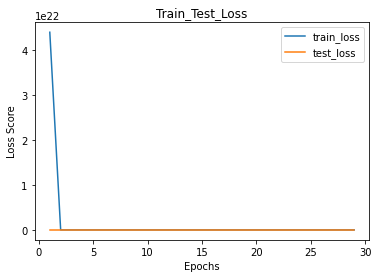

30
Train Epoch: 30 [0/7471 (0%)]	Loss: 66617.671875
Train Epoch: 30 [160/7471 (2%)]	Loss: 65885.875000
Train Epoch: 30 [320/7471 (4%)]	Loss: 63106.210938
Train Epoch: 30 [480/7471 (6%)]	Loss: 65678.796875
Train Epoch: 30 [640/7471 (9%)]	Loss: 63385.257812
Train Epoch: 30 [800/7471 (11%)]	Loss: 121119.742188
Train Epoch: 30 [960/7471 (13%)]	Loss: 76059.828125
Train Epoch: 30 [1120/7471 (15%)]	Loss: 81261.054688
Train Epoch: 30 [1280/7471 (17%)]	Loss: 69946.648438
Train Epoch: 30 [1440/7471 (19%)]	Loss: 71112.210938
Train Epoch: 30 [1600/7471 (21%)]	Loss: 67645.015625
Train Epoch: 30 [1760/7471 (24%)]	Loss: 67061.906250
Train Epoch: 30 [1920/7471 (26%)]	Loss: 69043.335938
Train Epoch: 30 [2080/7471 (28%)]	Loss: 66025.000000
Train Epoch: 30 [2240/7471 (30%)]	Loss: 68119.265625
Train Epoch: 30 [2400/7471 (32%)]	Loss: 72691.640625
Train Epoch: 30 [2560/7471 (34%)]	Loss: 70912.843750
Train Epoch: 30 [2720/7471 (36%)]	Loss: 67351.937500
Train Epoch: 30 [2880/7471 (39%)]	Loss: 3794994.500000
T

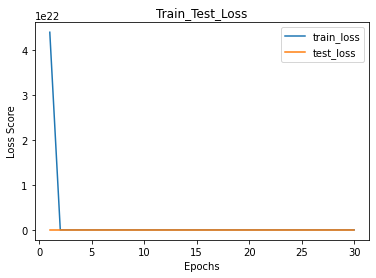

31
Train Epoch: 31 [0/7471 (0%)]	Loss: 66448.593750
Train Epoch: 31 [160/7471 (2%)]	Loss: 64990.597656
Train Epoch: 31 [320/7471 (4%)]	Loss: 64711.265625
Train Epoch: 31 [480/7471 (6%)]	Loss: 64714.054688
Train Epoch: 31 [640/7471 (9%)]	Loss: 65196.082031
Train Epoch: 31 [800/7471 (11%)]	Loss: 67058.132812
Train Epoch: 31 [960/7471 (13%)]	Loss: 67438.062500
Train Epoch: 31 [1120/7471 (15%)]	Loss: 63888.785156
Train Epoch: 31 [1280/7471 (17%)]	Loss: 63718.507812
Train Epoch: 31 [1440/7471 (19%)]	Loss: 63464.140625
Train Epoch: 31 [1600/7471 (21%)]	Loss: 62367.679688
Train Epoch: 31 [1760/7471 (24%)]	Loss: 65245.117188
Train Epoch: 31 [1920/7471 (26%)]	Loss: 62899.285156
Train Epoch: 31 [2080/7471 (28%)]	Loss: 65528.093750
Train Epoch: 31 [2240/7471 (30%)]	Loss: 65917.328125
Train Epoch: 31 [2400/7471 (32%)]	Loss: 66927.125000
Train Epoch: 31 [2560/7471 (34%)]	Loss: 65987.476562
Train Epoch: 31 [2720/7471 (36%)]	Loss: 62266.113281
Train Epoch: 31 [2880/7471 (39%)]	Loss: 66643.914062
Trai

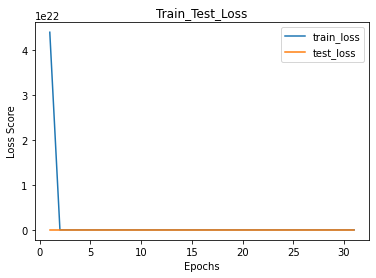

32
Train Epoch: 32 [0/7471 (0%)]	Loss: 65677.210938
Train Epoch: 32 [160/7471 (2%)]	Loss: 63227.984375
Train Epoch: 32 [320/7471 (4%)]	Loss: 64926.031250
Train Epoch: 32 [480/7471 (6%)]	Loss: 65596.632812
Train Epoch: 32 [640/7471 (9%)]	Loss: 65112.835938
Train Epoch: 32 [800/7471 (11%)]	Loss: 66598.875000
Train Epoch: 32 [960/7471 (13%)]	Loss: 62804.253906
Train Epoch: 32 [1120/7471 (15%)]	Loss: 64643.183594
Train Epoch: 32 [1280/7471 (17%)]	Loss: 64428.843750
Train Epoch: 32 [1440/7471 (19%)]	Loss: 67661.921875
Train Epoch: 32 [1600/7471 (21%)]	Loss: 66731.828125
Train Epoch: 32 [1760/7471 (24%)]	Loss: 63431.140625
Train Epoch: 32 [1920/7471 (26%)]	Loss: 69130.609375
Train Epoch: 32 [2080/7471 (28%)]	Loss: 71134.968750
Train Epoch: 32 [2240/7471 (30%)]	Loss: 68339.531250
Train Epoch: 32 [2400/7471 (32%)]	Loss: 65135.421875
Train Epoch: 32 [2560/7471 (34%)]	Loss: 66103.796875
Train Epoch: 32 [2720/7471 (36%)]	Loss: 66784.742188
Train Epoch: 32 [2880/7471 (39%)]	Loss: 68937.359375
Trai

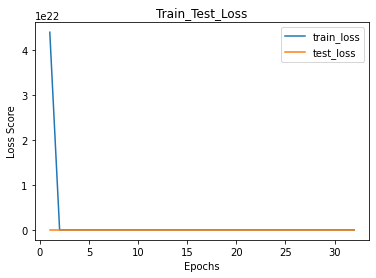

33
Train Epoch: 33 [0/7471 (0%)]	Loss: 72727.953125
Train Epoch: 33 [160/7471 (2%)]	Loss: 68362.601562
Train Epoch: 33 [320/7471 (4%)]	Loss: 69631.718750
Train Epoch: 33 [480/7471 (6%)]	Loss: 67456.375000
Train Epoch: 33 [640/7471 (9%)]	Loss: 63982.359375
Train Epoch: 33 [800/7471 (11%)]	Loss: 66471.031250
Train Epoch: 33 [960/7471 (13%)]	Loss: 62797.367188
Train Epoch: 33 [1120/7471 (15%)]	Loss: 73436.085938
Train Epoch: 33 [1280/7471 (17%)]	Loss: 67111.718750
Train Epoch: 33 [1440/7471 (19%)]	Loss: 67798.257812
Train Epoch: 33 [1600/7471 (21%)]	Loss: 70931.601562
Train Epoch: 33 [1760/7471 (24%)]	Loss: 66789.562500
Train Epoch: 33 [1920/7471 (26%)]	Loss: 66413.992188
Train Epoch: 33 [2080/7471 (28%)]	Loss: 73945.437500
Train Epoch: 33 [2240/7471 (30%)]	Loss: 66141.320312
Train Epoch: 33 [2400/7471 (32%)]	Loss: 65661.296875
Train Epoch: 33 [2560/7471 (34%)]	Loss: 63079.074219
Train Epoch: 33 [2720/7471 (36%)]	Loss: 65937.382812
Train Epoch: 33 [2880/7471 (39%)]	Loss: 68284.054688
Trai

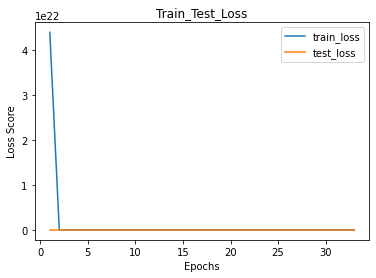

34
Train Epoch: 34 [0/7471 (0%)]	Loss: 67920.148438
Train Epoch: 34 [160/7471 (2%)]	Loss: 65376.734375
Train Epoch: 34 [320/7471 (4%)]	Loss: 63131.902344
Train Epoch: 34 [480/7471 (6%)]	Loss: 64990.945312
Train Epoch: 34 [640/7471 (9%)]	Loss: 63536.433594
Train Epoch: 34 [800/7471 (11%)]	Loss: 67366.390625
Train Epoch: 34 [960/7471 (13%)]	Loss: 62796.070312
Train Epoch: 34 [1120/7471 (15%)]	Loss: 65536.468750
Train Epoch: 34 [1280/7471 (17%)]	Loss: 63961.238281
Train Epoch: 34 [1440/7471 (19%)]	Loss: 63234.824219
Train Epoch: 34 [1600/7471 (21%)]	Loss: 74946.781250
Train Epoch: 34 [1760/7471 (24%)]	Loss: 68857.007812
Train Epoch: 34 [1920/7471 (26%)]	Loss: 64079.414062
Train Epoch: 34 [2080/7471 (28%)]	Loss: 66782.023438
Train Epoch: 34 [2240/7471 (30%)]	Loss: 62327.722656
Train Epoch: 34 [2400/7471 (32%)]	Loss: 64209.125000
Train Epoch: 34 [2560/7471 (34%)]	Loss: 63410.488281
Train Epoch: 34 [2720/7471 (36%)]	Loss: 70032.875000
Train Epoch: 34 [2880/7471 (39%)]	Loss: 64938.066406
Trai

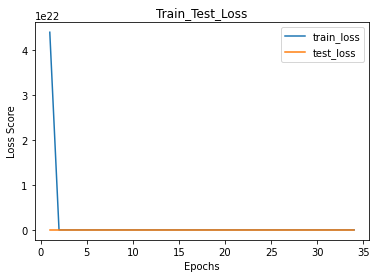

35
Train Epoch: 35 [0/7471 (0%)]	Loss: 64320.890625
Train Epoch: 35 [160/7471 (2%)]	Loss: 63935.000000
Train Epoch: 35 [320/7471 (4%)]	Loss: 67822.195312
Train Epoch: 35 [480/7471 (6%)]	Loss: 63790.062500
Train Epoch: 35 [640/7471 (9%)]	Loss: 66668.312500
Train Epoch: 35 [800/7471 (11%)]	Loss: 79688.750000
Train Epoch: 35 [960/7471 (13%)]	Loss: 63369.371094
Train Epoch: 35 [1120/7471 (15%)]	Loss: 65669.187500
Train Epoch: 35 [1280/7471 (17%)]	Loss: 67040.492188
Train Epoch: 35 [1440/7471 (19%)]	Loss: 67065.039062
Train Epoch: 35 [1600/7471 (21%)]	Loss: 65112.921875
Train Epoch: 35 [1760/7471 (24%)]	Loss: 67615.835938
Train Epoch: 35 [1920/7471 (26%)]	Loss: 66305.796875
Train Epoch: 35 [2080/7471 (28%)]	Loss: 66182.250000
Train Epoch: 35 [2240/7471 (30%)]	Loss: 83714.234375
Train Epoch: 35 [2400/7471 (32%)]	Loss: 70079.953125
Train Epoch: 35 [2560/7471 (34%)]	Loss: 64611.378906
Train Epoch: 35 [2720/7471 (36%)]	Loss: 66566.679688
Train Epoch: 35 [2880/7471 (39%)]	Loss: 67682.671875
Trai

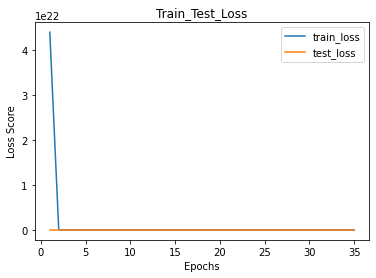

36
Train Epoch: 36 [0/7471 (0%)]	Loss: 66931.546875
Train Epoch: 36 [160/7471 (2%)]	Loss: 66691.296875
Train Epoch: 36 [320/7471 (4%)]	Loss: 66010.093750
Train Epoch: 36 [480/7471 (6%)]	Loss: 106153.476562
Train Epoch: 36 [640/7471 (9%)]	Loss: 78883.656250
Train Epoch: 36 [800/7471 (11%)]	Loss: 72246.039062
Train Epoch: 36 [960/7471 (13%)]	Loss: 64740.613281
Train Epoch: 36 [1120/7471 (15%)]	Loss: 67087.523438
Train Epoch: 36 [1280/7471 (17%)]	Loss: 65173.550781
Train Epoch: 36 [1440/7471 (19%)]	Loss: 67168.250000
Train Epoch: 36 [1600/7471 (21%)]	Loss: 66432.632812
Train Epoch: 36 [1760/7471 (24%)]	Loss: 65518.750000
Train Epoch: 36 [1920/7471 (26%)]	Loss: 62794.039062
Train Epoch: 36 [2080/7471 (28%)]	Loss: 65374.109375
Train Epoch: 36 [2240/7471 (30%)]	Loss: 64785.898438
Train Epoch: 36 [2400/7471 (32%)]	Loss: 66277.484375
Train Epoch: 36 [2560/7471 (34%)]	Loss: 64646.187500
Train Epoch: 36 [2720/7471 (36%)]	Loss: 69897.531250
Train Epoch: 36 [2880/7471 (39%)]	Loss: 74784.554688
Tra

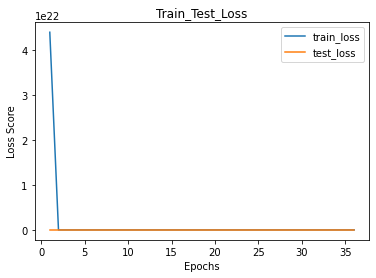

37
Train Epoch: 37 [0/7471 (0%)]	Loss: 67519.773438
Train Epoch: 37 [160/7471 (2%)]	Loss: 70883.546875
Train Epoch: 37 [320/7471 (4%)]	Loss: 67057.054688
Train Epoch: 37 [480/7471 (6%)]	Loss: 66601.687500
Train Epoch: 37 [640/7471 (9%)]	Loss: 69269.937500
Train Epoch: 37 [800/7471 (11%)]	Loss: 70377.265625
Train Epoch: 37 [960/7471 (13%)]	Loss: 66379.734375
Train Epoch: 37 [1120/7471 (15%)]	Loss: 69466.953125
Train Epoch: 37 [1280/7471 (17%)]	Loss: 76120.890625
Train Epoch: 37 [1440/7471 (19%)]	Loss: 67304.093750
Train Epoch: 37 [1600/7471 (21%)]	Loss: 67435.375000
Train Epoch: 37 [1760/7471 (24%)]	Loss: 70652.562500
Train Epoch: 37 [1920/7471 (26%)]	Loss: 69037.625000
Train Epoch: 37 [2080/7471 (28%)]	Loss: 69728.609375
Train Epoch: 37 [2240/7471 (30%)]	Loss: 65136.531250
Train Epoch: 37 [2400/7471 (32%)]	Loss: 67215.671875
Train Epoch: 37 [2560/7471 (34%)]	Loss: 65852.296875
Train Epoch: 37 [2720/7471 (36%)]	Loss: 69053.765625
Train Epoch: 37 [2880/7471 (39%)]	Loss: 66427.007812
Trai

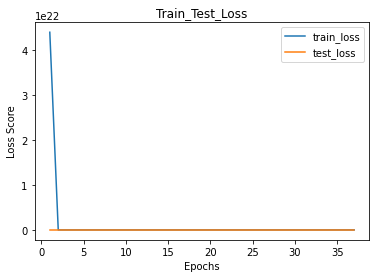

38
Train Epoch: 38 [0/7471 (0%)]	Loss: 73023.601562
Train Epoch: 38 [160/7471 (2%)]	Loss: 68811.812500
Train Epoch: 38 [320/7471 (4%)]	Loss: 70960.445312
Train Epoch: 38 [480/7471 (6%)]	Loss: 64461.433594
Train Epoch: 38 [640/7471 (9%)]	Loss: 67231.023438
Train Epoch: 38 [800/7471 (11%)]	Loss: 69811.500000
Train Epoch: 38 [960/7471 (13%)]	Loss: 67246.765625
Train Epoch: 38 [1120/7471 (15%)]	Loss: 67619.406250
Train Epoch: 38 [1280/7471 (17%)]	Loss: 69304.429688
Train Epoch: 38 [1440/7471 (19%)]	Loss: 68511.414062
Train Epoch: 38 [1600/7471 (21%)]	Loss: 65640.843750
Train Epoch: 38 [1760/7471 (24%)]	Loss: 69967.718750
Train Epoch: 38 [1920/7471 (26%)]	Loss: 515230.187500
Train Epoch: 38 [2080/7471 (28%)]	Loss: 247198.875000
Train Epoch: 38 [2240/7471 (30%)]	Loss: 108024.375000
Train Epoch: 38 [2400/7471 (32%)]	Loss: 80500.453125
Train Epoch: 38 [2560/7471 (34%)]	Loss: 73119.484375
Train Epoch: 38 [2720/7471 (36%)]	Loss: 68095.398438
Train Epoch: 38 [2880/7471 (39%)]	Loss: 65605.437500
T

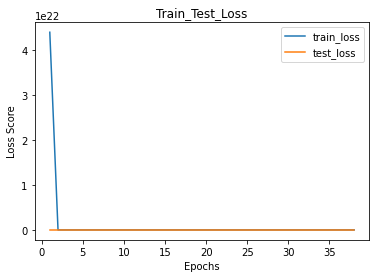

39
Train Epoch: 39 [0/7471 (0%)]	Loss: 66760.617188
Train Epoch: 39 [160/7471 (2%)]	Loss: 67251.484375
Train Epoch: 39 [320/7471 (4%)]	Loss: 65670.507812
Train Epoch: 39 [480/7471 (6%)]	Loss: 68664.375000
Train Epoch: 39 [640/7471 (9%)]	Loss: 68389.828125
Train Epoch: 39 [800/7471 (11%)]	Loss: 68866.890625
Train Epoch: 39 [960/7471 (13%)]	Loss: 71242.390625
Train Epoch: 39 [1120/7471 (15%)]	Loss: 542199.375000
Train Epoch: 39 [1280/7471 (17%)]	Loss: 270346.812500
Train Epoch: 39 [1440/7471 (19%)]	Loss: 98093.796875
Train Epoch: 39 [1600/7471 (21%)]	Loss: 104726.109375
Train Epoch: 39 [1760/7471 (24%)]	Loss: 77618.101562
Train Epoch: 39 [1920/7471 (26%)]	Loss: 69343.492188
Train Epoch: 39 [2080/7471 (28%)]	Loss: 82604.281250
Train Epoch: 39 [2240/7471 (30%)]	Loss: 65830.070312
Train Epoch: 39 [2400/7471 (32%)]	Loss: 69821.039062
Train Epoch: 39 [2560/7471 (34%)]	Loss: 64402.589844
Train Epoch: 39 [2720/7471 (36%)]	Loss: 88409.960938
Train Epoch: 39 [2880/7471 (39%)]	Loss: 76192.164062
T

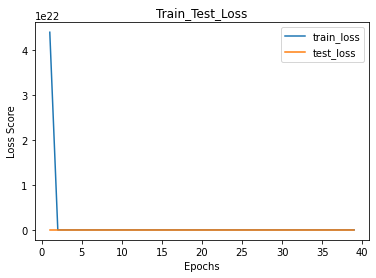

40
Train Epoch: 40 [0/7471 (0%)]	Loss: 64781.648438
Train Epoch: 40 [160/7471 (2%)]	Loss: 69860.179688
Train Epoch: 40 [320/7471 (4%)]	Loss: 62117.609375
Train Epoch: 40 [480/7471 (6%)]	Loss: 68530.265625
Train Epoch: 40 [640/7471 (9%)]	Loss: 72366.296875
Train Epoch: 40 [800/7471 (11%)]	Loss: 68754.171875
Train Epoch: 40 [960/7471 (13%)]	Loss: 788380.250000
Train Epoch: 40 [1120/7471 (15%)]	Loss: 354460.125000
Train Epoch: 40 [1280/7471 (17%)]	Loss: 487347.125000
Train Epoch: 40 [1440/7471 (19%)]	Loss: 95259.796875
Train Epoch: 40 [1600/7471 (21%)]	Loss: 76379.257812
Train Epoch: 40 [1760/7471 (24%)]	Loss: 70435.812500
Train Epoch: 40 [1920/7471 (26%)]	Loss: 66028.109375
Train Epoch: 40 [2080/7471 (28%)]	Loss: 65395.277344
Train Epoch: 40 [2240/7471 (30%)]	Loss: 66389.812500
Train Epoch: 40 [2400/7471 (32%)]	Loss: 64814.210938
Train Epoch: 40 [2560/7471 (34%)]	Loss: 66132.945312
Train Epoch: 40 [2720/7471 (36%)]	Loss: 67868.468750
Train Epoch: 40 [2880/7471 (39%)]	Loss: 66259.156250
T

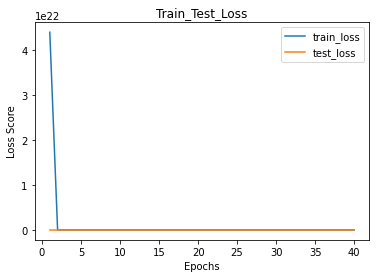

41
Train Epoch: 41 [0/7471 (0%)]	Loss: 66224.515625
Train Epoch: 41 [160/7471 (2%)]	Loss: 65672.734375
Train Epoch: 41 [320/7471 (4%)]	Loss: 73371.507812
Train Epoch: 41 [480/7471 (6%)]	Loss: 66988.468750
Train Epoch: 41 [640/7471 (9%)]	Loss: 63898.113281
Train Epoch: 41 [800/7471 (11%)]	Loss: 72163.140625
Train Epoch: 41 [960/7471 (13%)]	Loss: 65893.500000
Train Epoch: 41 [1120/7471 (15%)]	Loss: 64430.414062
Train Epoch: 41 [1280/7471 (17%)]	Loss: 65013.320312
Train Epoch: 41 [1440/7471 (19%)]	Loss: 67199.625000
Train Epoch: 41 [1600/7471 (21%)]	Loss: 63730.421875
Train Epoch: 41 [1760/7471 (24%)]	Loss: 64932.945312
Train Epoch: 41 [1920/7471 (26%)]	Loss: 65023.691406
Train Epoch: 41 [2080/7471 (28%)]	Loss: 62825.441406
Train Epoch: 41 [2240/7471 (30%)]	Loss: 63399.992188
Train Epoch: 41 [2400/7471 (32%)]	Loss: 78753.250000
Train Epoch: 41 [2560/7471 (34%)]	Loss: 66684.921875
Train Epoch: 41 [2720/7471 (36%)]	Loss: 65919.835938
Train Epoch: 41 [2880/7471 (39%)]	Loss: 79344.226562
Trai

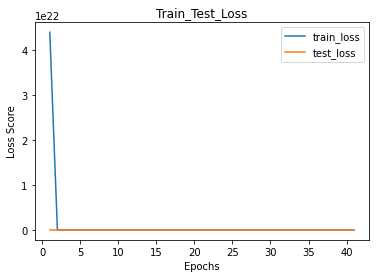

42
Train Epoch: 42 [0/7471 (0%)]	Loss: 79025.937500
Train Epoch: 42 [160/7471 (2%)]	Loss: 76220.765625
Train Epoch: 42 [320/7471 (4%)]	Loss: 70190.882812
Train Epoch: 42 [480/7471 (6%)]	Loss: 64393.792969
Train Epoch: 42 [640/7471 (9%)]	Loss: 66186.218750
Train Epoch: 42 [800/7471 (11%)]	Loss: 67929.484375
Train Epoch: 42 [960/7471 (13%)]	Loss: 66102.031250
Train Epoch: 42 [1120/7471 (15%)]	Loss: 123308.250000
Train Epoch: 42 [1280/7471 (17%)]	Loss: 115478.218750
Train Epoch: 42 [1440/7471 (19%)]	Loss: 69824.234375
Train Epoch: 42 [1600/7471 (21%)]	Loss: 70583.875000
Train Epoch: 42 [1760/7471 (24%)]	Loss: 73544.453125
Train Epoch: 42 [1920/7471 (26%)]	Loss: 66545.171875
Train Epoch: 42 [2080/7471 (28%)]	Loss: 68436.328125
Train Epoch: 42 [2240/7471 (30%)]	Loss: 69464.929688
Train Epoch: 42 [2400/7471 (32%)]	Loss: 66940.359375
Train Epoch: 42 [2560/7471 (34%)]	Loss: 107431.000000
Train Epoch: 42 [2720/7471 (36%)]	Loss: 88881.453125
Train Epoch: 42 [2880/7471 (39%)]	Loss: 68997.296875
T

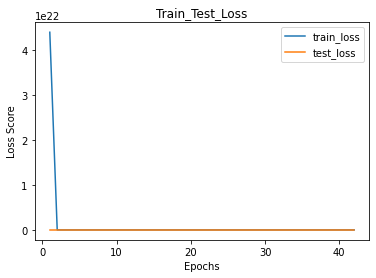

43
Train Epoch: 43 [0/7471 (0%)]	Loss: 87875.781250
Train Epoch: 43 [160/7471 (2%)]	Loss: 97620.679688
Train Epoch: 43 [320/7471 (4%)]	Loss: 1272519.375000
Train Epoch: 43 [480/7471 (6%)]	Loss: 505416.250000
Train Epoch: 43 [640/7471 (9%)]	Loss: 167653.546875
Train Epoch: 43 [800/7471 (11%)]	Loss: 114663.546875
Train Epoch: 43 [960/7471 (13%)]	Loss: 88182.171875
Train Epoch: 43 [1120/7471 (15%)]	Loss: 74318.500000
Train Epoch: 43 [1280/7471 (17%)]	Loss: 69209.203125
Train Epoch: 43 [1440/7471 (19%)]	Loss: 70493.109375
Train Epoch: 43 [1600/7471 (21%)]	Loss: 67535.359375
Train Epoch: 43 [1760/7471 (24%)]	Loss: 66985.921875
Train Epoch: 43 [1920/7471 (26%)]	Loss: 64770.886719
Train Epoch: 43 [2080/7471 (28%)]	Loss: 66977.500000
Train Epoch: 43 [2240/7471 (30%)]	Loss: 64562.464844
Train Epoch: 43 [2400/7471 (32%)]	Loss: 64255.402344
Train Epoch: 43 [2560/7471 (34%)]	Loss: 67821.289062
Train Epoch: 43 [2720/7471 (36%)]	Loss: 67911.984375
Train Epoch: 43 [2880/7471 (39%)]	Loss: 68411.851562

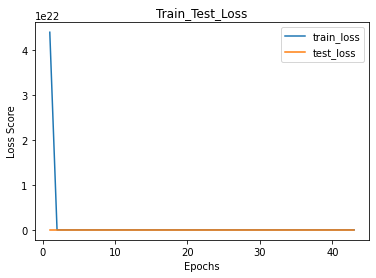

44
Train Epoch: 44 [0/7471 (0%)]	Loss: 78245.812500
Train Epoch: 44 [160/7471 (2%)]	Loss: 71702.531250
Train Epoch: 44 [320/7471 (4%)]	Loss: 69614.187500
Train Epoch: 44 [480/7471 (6%)]	Loss: 91388.859375
Train Epoch: 44 [640/7471 (9%)]	Loss: 74965.851562
Train Epoch: 44 [800/7471 (11%)]	Loss: 71584.648438
Train Epoch: 44 [960/7471 (13%)]	Loss: 70817.921875
Train Epoch: 44 [1120/7471 (15%)]	Loss: 69460.757812
Train Epoch: 44 [1280/7471 (17%)]	Loss: 71174.671875
Train Epoch: 44 [1440/7471 (19%)]	Loss: 69107.718750
Train Epoch: 44 [1600/7471 (21%)]	Loss: 68131.000000
Train Epoch: 44 [1760/7471 (24%)]	Loss: 475496.218750
Train Epoch: 44 [1920/7471 (26%)]	Loss: 213800.203125
Train Epoch: 44 [2080/7471 (28%)]	Loss: 96653.007812
Train Epoch: 44 [2240/7471 (30%)]	Loss: 81272.859375
Train Epoch: 44 [2400/7471 (32%)]	Loss: 74792.390625
Train Epoch: 44 [2560/7471 (34%)]	Loss: 66436.554688
Train Epoch: 44 [2720/7471 (36%)]	Loss: 67847.078125
Train Epoch: 44 [2880/7471 (39%)]	Loss: 70461.328125
Tr

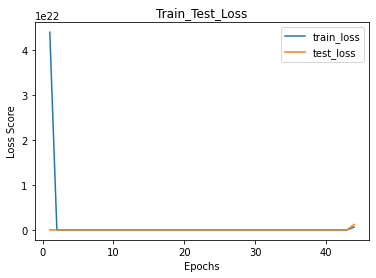

45
Train Epoch: 45 [0/7471 (0%)]	Loss: 171074093056.000000
Train Epoch: 45 [160/7471 (2%)]	Loss: 8110738608614478446592.000000
Train Epoch: 45 [320/7471 (4%)]	Loss: 902842112.000000
Train Epoch: 45 [480/7471 (6%)]	Loss: 3268477696.000000
Train Epoch: 45 [640/7471 (9%)]	Loss: 2126569728.000000
Train Epoch: 45 [800/7471 (11%)]	Loss: 2743420160.000000
Train Epoch: 45 [960/7471 (13%)]	Loss: 286901501952.000000
Train Epoch: 45 [1120/7471 (15%)]	Loss: 1008183616.000000
Train Epoch: 45 [1280/7471 (17%)]	Loss: 19383736320.000000
Train Epoch: 45 [1440/7471 (19%)]	Loss: 937272336318489165824.000000
Train Epoch: 45 [1600/7471 (21%)]	Loss: 930540288.000000
Train Epoch: 45 [1760/7471 (24%)]	Loss: 877832384.000000
Train Epoch: 45 [1920/7471 (26%)]	Loss: 15627567268169286418432.000000
Train Epoch: 45 [2080/7471 (28%)]	Loss: 2463990016.000000
Train Epoch: 45 [2240/7471 (30%)]	Loss: 4912023759227331805184.000000
Train Epoch: 45 [2400/7471 (32%)]	Loss: 1484646400.000000
Train Epoch: 45 [2560/7471 (34%)]

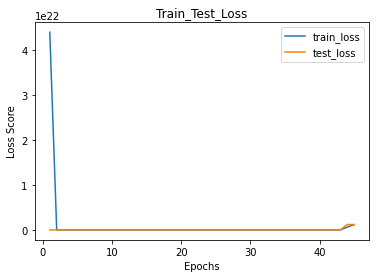

46
Train Epoch: 46 [0/7471 (0%)]	Loss: 110165434368.000000
Train Epoch: 46 [160/7471 (2%)]	Loss: 21694132224.000000
Train Epoch: 46 [320/7471 (4%)]	Loss: 280752416.000000
Train Epoch: 46 [480/7471 (6%)]	Loss: 13025308590481134845952.000000
Train Epoch: 46 [640/7471 (9%)]	Loss: 4840169953072542384128.000000
Train Epoch: 46 [800/7471 (11%)]	Loss: 2875715840.000000
Train Epoch: 46 [960/7471 (13%)]	Loss: 29550915584.000000
Train Epoch: 46 [1120/7471 (15%)]	Loss: 4883214232411042742272.000000
Train Epoch: 46 [1280/7471 (17%)]	Loss: 582274252800.000000
Train Epoch: 46 [1440/7471 (19%)]	Loss: 654280640.000000
Train Epoch: 46 [1600/7471 (21%)]	Loss: 76992806912.000000
Train Epoch: 46 [1760/7471 (24%)]	Loss: 423776160.000000
Train Epoch: 46 [1920/7471 (26%)]	Loss: 947485760.000000
Train Epoch: 46 [2080/7471 (28%)]	Loss: 380353152.000000
Train Epoch: 46 [2240/7471 (30%)]	Loss: 988507328.000000
Train Epoch: 46 [2400/7471 (32%)]	Loss: 4822679660969695641600.000000
Train Epoch: 46 [2560/7471 (34%)]

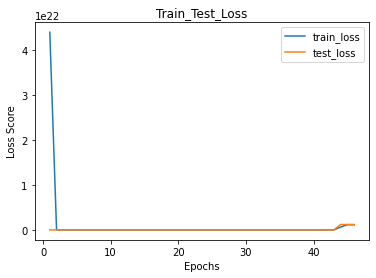

47
Train Epoch: 47 [0/7471 (0%)]	Loss: 36308832256.000000
Train Epoch: 47 [160/7471 (2%)]	Loss: 146150000.000000
Train Epoch: 47 [320/7471 (4%)]	Loss: 493433280.000000
Train Epoch: 47 [480/7471 (6%)]	Loss: 34988707840.000000
Train Epoch: 47 [640/7471 (9%)]	Loss: 21845053440.000000
Train Epoch: 47 [800/7471 (11%)]	Loss: 240416432.000000
Train Epoch: 47 [960/7471 (13%)]	Loss: 360019808.000000
Train Epoch: 47 [1120/7471 (15%)]	Loss: 3932028939837466738688.000000
Train Epoch: 47 [1280/7471 (17%)]	Loss: 1766995584.000000
Train Epoch: 47 [1440/7471 (19%)]	Loss: 111408072.000000
Train Epoch: 47 [1600/7471 (21%)]	Loss: 496444416.000000
Train Epoch: 47 [1760/7471 (24%)]	Loss: 132124040.000000
Train Epoch: 47 [1920/7471 (26%)]	Loss: 172148672.000000
Train Epoch: 47 [2080/7471 (28%)]	Loss: 121914286080.000000
Train Epoch: 47 [2240/7471 (30%)]	Loss: 2880343900160.000000
Train Epoch: 47 [2400/7471 (32%)]	Loss: 1560993280.000000
Train Epoch: 47 [2560/7471 (34%)]	Loss: 420767264.000000
Train Epoch: 4

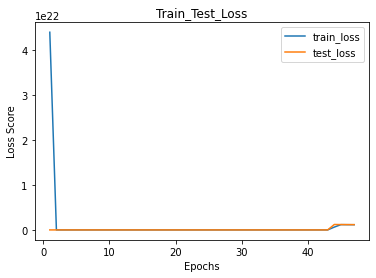

48
Train Epoch: 48 [0/7471 (0%)]	Loss: 12729209299880500002816.000000
Train Epoch: 48 [160/7471 (2%)]	Loss: 150809182208.000000
Train Epoch: 48 [320/7471 (4%)]	Loss: 11379419136.000000
Train Epoch: 48 [480/7471 (6%)]	Loss: 993534272.000000
Train Epoch: 48 [640/7471 (9%)]	Loss: 130522000.000000
Train Epoch: 48 [800/7471 (11%)]	Loss: 5263824695919191785472.000000
Train Epoch: 48 [960/7471 (13%)]	Loss: 4812681669796933140480.000000
Train Epoch: 48 [1120/7471 (15%)]	Loss: 12728917691804627763200.000000
Train Epoch: 48 [1280/7471 (17%)]	Loss: 484011520.000000
Train Epoch: 48 [1440/7471 (19%)]	Loss: 18193092608.000000
Train Epoch: 48 [1600/7471 (21%)]	Loss: 335289536.000000
Train Epoch: 48 [1760/7471 (24%)]	Loss: 228544096.000000
Train Epoch: 48 [1920/7471 (26%)]	Loss: 112099360.000000
Train Epoch: 48 [2080/7471 (28%)]	Loss: 988487040.000000
Train Epoch: 48 [2240/7471 (30%)]	Loss: 286057344.000000
Train Epoch: 48 [2400/7471 (32%)]	Loss: 7868973568.000000
Train Epoch: 48 [2560/7471 (34%)]	Los

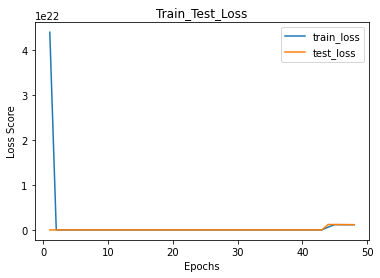

49
Train Epoch: 49 [0/7471 (0%)]	Loss: 52834560.000000
Train Epoch: 49 [160/7471 (2%)]	Loss: 71744008.000000
Train Epoch: 49 [320/7471 (4%)]	Loss: 7757415936.000000
Train Epoch: 49 [480/7471 (6%)]	Loss: 67776568.000000
Train Epoch: 49 [640/7471 (9%)]	Loss: 21897248768.000000
Train Epoch: 49 [800/7471 (11%)]	Loss: 463310979072.000000
Train Epoch: 49 [960/7471 (13%)]	Loss: 937987904.000000
Train Epoch: 49 [1120/7471 (15%)]	Loss: 137084256.000000
Train Epoch: 49 [1280/7471 (17%)]	Loss: 5609043621755649785856.000000
Train Epoch: 49 [1440/7471 (19%)]	Loss: 14770637824.000000
Train Epoch: 49 [1600/7471 (21%)]	Loss: 12707910651342758084608.000000
Train Epoch: 49 [1760/7471 (24%)]	Loss: 8032530786335422676992.000000
Train Epoch: 49 [1920/7471 (26%)]	Loss: 22714910720.000000
Train Epoch: 49 [2080/7471 (28%)]	Loss: 702940288.000000
Train Epoch: 49 [2240/7471 (30%)]	Loss: 549078464.000000
Train Epoch: 49 [2400/7471 (32%)]	Loss: 128730536.000000
Train Epoch: 49 [2560/7471 (34%)]	Loss: 72916080.000

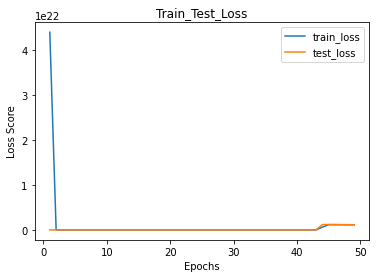

50
Train Epoch: 50 [0/7471 (0%)]	Loss: 162934896.000000
Train Epoch: 50 [160/7471 (2%)]	Loss: 44625924096.000000
Train Epoch: 50 [320/7471 (4%)]	Loss: 12929318868023360094208.000000
Train Epoch: 50 [480/7471 (6%)]	Loss: 508717888183493197824.000000
Train Epoch: 50 [640/7471 (9%)]	Loss: 47309308.000000
Train Epoch: 50 [800/7471 (11%)]	Loss: 54879576.000000
Train Epoch: 50 [960/7471 (13%)]	Loss: 2382695529479887912960.000000
Train Epoch: 50 [1120/7471 (15%)]	Loss: 15928624128.000000
Train Epoch: 50 [1280/7471 (17%)]	Loss: 474930300482215739392.000000
Train Epoch: 50 [1440/7471 (19%)]	Loss: 10535761920.000000
Train Epoch: 50 [1600/7471 (21%)]	Loss: 92434336.000000
Train Epoch: 50 [1760/7471 (24%)]	Loss: 23924574.000000
Train Epoch: 50 [1920/7471 (26%)]	Loss: 13018862592.000000
Train Epoch: 50 [2080/7471 (28%)]	Loss: 18051274752.000000
Train Epoch: 50 [2240/7471 (30%)]	Loss: 288025120.000000
Train Epoch: 50 [2400/7471 (32%)]	Loss: 5257503330892223873024.000000
Train Epoch: 50 [2560/7471 (3

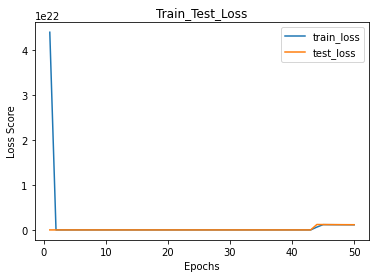

51
Train Epoch: 51 [0/7471 (0%)]	Loss: 12622875934978562064384.000000
Train Epoch: 51 [160/7471 (2%)]	Loss: 20520492.000000
Train Epoch: 51 [320/7471 (4%)]	Loss: 1706211728687104.000000
Train Epoch: 51 [480/7471 (6%)]	Loss: 282264384.000000
Train Epoch: 51 [640/7471 (9%)]	Loss: 14902272000.000000
Train Epoch: 51 [800/7471 (11%)]	Loss: 21596956.000000
Train Epoch: 51 [960/7471 (13%)]	Loss: 2322161661725982588928.000000
Train Epoch: 51 [1120/7471 (15%)]	Loss: 275604288.000000
Train Epoch: 51 [1280/7471 (17%)]	Loss: 24184219648.000000
Train Epoch: 51 [1440/7471 (19%)]	Loss: 11112067072.000000
Train Epoch: 51 [1600/7471 (21%)]	Loss: 472734162345175023616.000000
Train Epoch: 51 [1760/7471 (24%)]	Loss: 34384140.000000
Train Epoch: 51 [1920/7471 (26%)]	Loss: 3978579712.000000
Train Epoch: 51 [2080/7471 (28%)]	Loss: 48866992.000000
Train Epoch: 51 [2240/7471 (30%)]	Loss: 349914824704.000000
Train Epoch: 51 [2400/7471 (32%)]	Loss: 13507650560.000000
Train Epoch: 51 [2560/7471 (34%)]	Loss: 22918

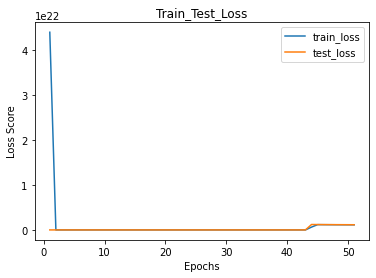

52
Train Epoch: 52 [0/7471 (0%)]	Loss: 20320761856.000000
Train Epoch: 52 [160/7471 (2%)]	Loss: 48678080.000000
Train Epoch: 52 [320/7471 (4%)]	Loss: 12974280554903213441024.000000
Train Epoch: 52 [480/7471 (6%)]	Loss: 3458255607062648061952.000000
Train Epoch: 52 [640/7471 (9%)]	Loss: 144589712.000000
Train Epoch: 52 [800/7471 (11%)]	Loss: 43737052.000000
Train Epoch: 52 [960/7471 (13%)]	Loss: 14533967.000000
Train Epoch: 52 [1120/7471 (15%)]	Loss: 34299364.000000
Train Epoch: 52 [1280/7471 (17%)]	Loss: 18691639296.000000
Train Epoch: 52 [1440/7471 (19%)]	Loss: 44358984.000000
Train Epoch: 52 [1600/7471 (21%)]	Loss: 22746333184.000000
Train Epoch: 52 [1760/7471 (24%)]	Loss: 20932278.000000
Train Epoch: 52 [1920/7471 (26%)]	Loss: 26458818.000000
Train Epoch: 52 [2080/7471 (28%)]	Loss: 17138304000.000000
Train Epoch: 52 [2240/7471 (30%)]	Loss: 24249802.000000
Train Epoch: 52 [2400/7471 (32%)]	Loss: 13921804.000000
Train Epoch: 52 [2560/7471 (34%)]	Loss: 19421584.000000
Train Epoch: 52 [

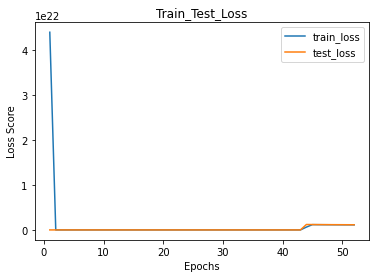

53
Train Epoch: 53 [0/7471 (0%)]	Loss: 19939202.000000
Train Epoch: 53 [160/7471 (2%)]	Loss: 104553440.000000
Train Epoch: 53 [320/7471 (4%)]	Loss: 2688501504.000000
Train Epoch: 53 [480/7471 (6%)]	Loss: 16285639.000000
Train Epoch: 53 [640/7471 (9%)]	Loss: 47483092992.000000
Train Epoch: 53 [800/7471 (11%)]	Loss: 57360355328.000000
Train Epoch: 53 [960/7471 (13%)]	Loss: 11828880.000000
Train Epoch: 53 [1120/7471 (15%)]	Loss: 7888887.500000
Train Epoch: 53 [1280/7471 (17%)]	Loss: 1781212032.000000
Train Epoch: 53 [1440/7471 (19%)]	Loss: 15633644.000000
Train Epoch: 53 [1600/7471 (21%)]	Loss: 3312844.000000
Train Epoch: 53 [1760/7471 (24%)]	Loss: 2287110568038623084544.000000
Train Epoch: 53 [1920/7471 (26%)]	Loss: 80225536.000000
Train Epoch: 53 [2080/7471 (28%)]	Loss: 13604463.000000
Train Epoch: 53 [2240/7471 (30%)]	Loss: 11065519104.000000
Train Epoch: 53 [2400/7471 (32%)]	Loss: 7983561458737163010048.000000
Train Epoch: 53 [2560/7471 (34%)]	Loss: 5471589888.000000
Train Epoch: 53 [

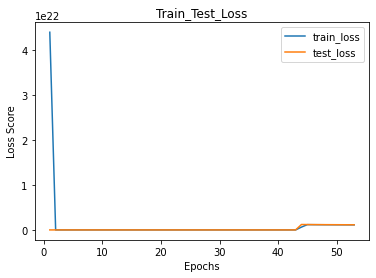

54
Train Epoch: 54 [0/7471 (0%)]	Loss: 8445317217381320228864.000000
Train Epoch: 54 [160/7471 (2%)]	Loss: 4289719.500000
Train Epoch: 54 [320/7471 (4%)]	Loss: 8498231.000000
Train Epoch: 54 [480/7471 (6%)]	Loss: 1820334208.000000
Train Epoch: 54 [640/7471 (9%)]	Loss: 8486728.000000
Train Epoch: 54 [800/7471 (11%)]	Loss: 5509637.500000
Train Epoch: 54 [960/7471 (13%)]	Loss: 3951454.750000
Train Epoch: 54 [1120/7471 (15%)]	Loss: 4502167.500000
Train Epoch: 54 [1280/7471 (17%)]	Loss: 12347930051827686440960.000000
Train Epoch: 54 [1440/7471 (19%)]	Loss: 7347525.500000
Train Epoch: 54 [1600/7471 (21%)]	Loss: 4446788.000000
Train Epoch: 54 [1760/7471 (24%)]	Loss: 8507482.000000
Train Epoch: 54 [1920/7471 (26%)]	Loss: 59787079680.000000
Train Epoch: 54 [2080/7471 (28%)]	Loss: 5198353053386339778560.000000
Train Epoch: 54 [2240/7471 (30%)]	Loss: 6194994584373849751552.000000
Train Epoch: 54 [2400/7471 (32%)]	Loss: 12200358189203456.000000
Train Epoch: 54 [2560/7471 (34%)]	Loss: 7688921088.00

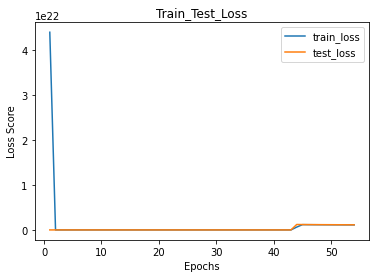

55
Train Epoch: 55 [0/7471 (0%)]	Loss: 6353598.500000
Train Epoch: 55 [160/7471 (2%)]	Loss: 1627426727657472.000000
Train Epoch: 55 [320/7471 (4%)]	Loss: 4363283.500000
Train Epoch: 55 [480/7471 (6%)]	Loss: 5420675.500000
Train Epoch: 55 [640/7471 (9%)]	Loss: 3110873.000000
Train Epoch: 55 [800/7471 (11%)]	Loss: 13103926803276234752000.000000
Train Epoch: 55 [960/7471 (13%)]	Loss: 4069715.000000
Train Epoch: 55 [1120/7471 (15%)]	Loss: 1337266.500000
Train Epoch: 55 [1280/7471 (17%)]	Loss: 1310782.125000
Train Epoch: 55 [1440/7471 (19%)]	Loss: 2376769.750000
Train Epoch: 55 [1600/7471 (21%)]	Loss: 2146354.500000
Train Epoch: 55 [1760/7471 (24%)]	Loss: 4106178.000000
Train Epoch: 55 [1920/7471 (26%)]	Loss: 70150348800.000000
Train Epoch: 55 [2080/7471 (28%)]	Loss: 11147297.000000
Train Epoch: 55 [2240/7471 (30%)]	Loss: 2482224.000000
Train Epoch: 55 [2400/7471 (32%)]	Loss: 11260100198535132086272.000000
Train Epoch: 55 [2560/7471 (34%)]	Loss: 11934558.000000
Train Epoch: 55 [2720/7471 (3

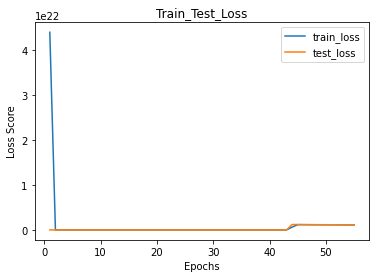

56
Train Epoch: 56 [0/7471 (0%)]	Loss: 3707640.000000
Train Epoch: 56 [160/7471 (2%)]	Loss: 1012000.437500
Train Epoch: 56 [320/7471 (4%)]	Loss: 29604764.000000
Train Epoch: 56 [480/7471 (6%)]	Loss: 2905374.000000
Train Epoch: 56 [640/7471 (9%)]	Loss: 972656.312500
Train Epoch: 56 [800/7471 (11%)]	Loss: 4204947.000000
Train Epoch: 56 [960/7471 (13%)]	Loss: 5016737280.000000
Train Epoch: 56 [1120/7471 (15%)]	Loss: 16843442.000000
Train Epoch: 56 [1280/7471 (17%)]	Loss: 951471.437500
Train Epoch: 56 [1440/7471 (19%)]	Loss: 1237409024.000000
Train Epoch: 56 [1600/7471 (21%)]	Loss: 3227780236957265690624.000000
Train Epoch: 56 [1760/7471 (24%)]	Loss: 1695583104.000000
Train Epoch: 56 [1920/7471 (26%)]	Loss: 12942495274633139322880.000000
Train Epoch: 56 [2080/7471 (28%)]	Loss: 1585947678343168.000000
Train Epoch: 56 [2240/7471 (30%)]	Loss: 1485116160.000000
Train Epoch: 56 [2400/7471 (32%)]	Loss: 2319916288.000000
Train Epoch: 56 [2560/7471 (34%)]	Loss: 364899172352.000000
Train Epoch: 56 

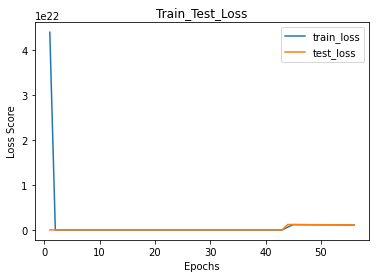

57
Train Epoch: 57 [0/7471 (0%)]	Loss: 2117389.500000
Train Epoch: 57 [160/7471 (2%)]	Loss: 582318208.000000
Train Epoch: 57 [320/7471 (4%)]	Loss: 577975.812500
Train Epoch: 57 [480/7471 (6%)]	Loss: 285499.843750
Train Epoch: 57 [640/7471 (9%)]	Loss: 254108114703125315584.000000
Train Epoch: 57 [800/7471 (11%)]	Loss: 517364544.000000
Train Epoch: 57 [960/7471 (13%)]	Loss: 530103.187500
Train Epoch: 57 [1120/7471 (15%)]	Loss: 499422112.000000
Train Epoch: 57 [1280/7471 (17%)]	Loss: 4085889.500000
Train Epoch: 57 [1440/7471 (19%)]	Loss: 3455947793728597393408.000000
Train Epoch: 57 [1600/7471 (21%)]	Loss: 1426820.375000
Train Epoch: 57 [1760/7471 (24%)]	Loss: 1572591538012160.000000
Train Epoch: 57 [1920/7471 (26%)]	Loss: 15716240.000000
Train Epoch: 57 [2080/7471 (28%)]	Loss: 236656701331436732416.000000
Train Epoch: 57 [2240/7471 (30%)]	Loss: 2216117504.000000
Train Epoch: 57 [2400/7471 (32%)]	Loss: 3406603520.000000
Train Epoch: 57 [2560/7471 (34%)]	Loss: 687826112.000000
Train Epoch:

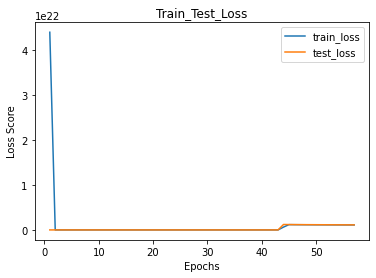

58
Train Epoch: 58 [0/7471 (0%)]	Loss: 791944128.000000
Train Epoch: 58 [160/7471 (2%)]	Loss: 37176708.000000
Train Epoch: 58 [320/7471 (4%)]	Loss: 319741231104.000000
Train Epoch: 58 [480/7471 (6%)]	Loss: 11660588424898587656192.000000
Train Epoch: 58 [640/7471 (9%)]	Loss: 5323484160.000000
Train Epoch: 58 [800/7471 (11%)]	Loss: 836977.000000
Train Epoch: 58 [960/7471 (13%)]	Loss: 12279677999474886574080.000000
Train Epoch: 58 [1120/7471 (15%)]	Loss: 214341.218750
Train Epoch: 58 [1280/7471 (17%)]	Loss: 2169982074829878067200.000000
Train Epoch: 58 [1440/7471 (19%)]	Loss: 2441143552.000000
Train Epoch: 58 [1600/7471 (21%)]	Loss: 21540634624.000000
Train Epoch: 58 [1760/7471 (24%)]	Loss: 1666586.875000
Train Epoch: 58 [1920/7471 (26%)]	Loss: 1666998912.000000
Train Epoch: 58 [2080/7471 (28%)]	Loss: 225865372936815247360.000000
Train Epoch: 58 [2240/7471 (30%)]	Loss: 175184.250000
Train Epoch: 58 [2400/7471 (32%)]	Loss: 6324992676467759382528.000000
Train Epoch: 58 [2560/7471 (34%)]	Los

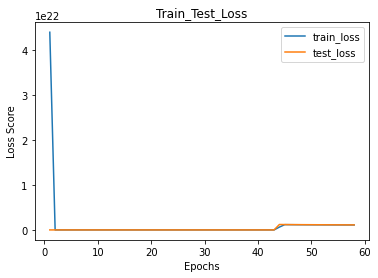

59
Train Epoch: 59 [0/7471 (0%)]	Loss: 1036632.500000
Train Epoch: 59 [160/7471 (2%)]	Loss: 4312768512.000000
Train Epoch: 59 [320/7471 (4%)]	Loss: 837506.312500
Train Epoch: 59 [480/7471 (6%)]	Loss: 597973056.000000
Train Epoch: 59 [640/7471 (9%)]	Loss: 210707259345690689536.000000
Train Epoch: 59 [800/7471 (11%)]	Loss: 30976397312.000000
Train Epoch: 59 [960/7471 (13%)]	Loss: 3806379520.000000
Train Epoch: 59 [1120/7471 (15%)]	Loss: 165956.156250
Train Epoch: 59 [1280/7471 (17%)]	Loss: 411006.625000
Train Epoch: 59 [1440/7471 (19%)]	Loss: 217640603748585701376.000000
Train Epoch: 59 [1600/7471 (21%)]	Loss: 7283552.000000
Train Epoch: 59 [1760/7471 (24%)]	Loss: 199057752064.000000
Train Epoch: 59 [1920/7471 (26%)]	Loss: 2305265920.000000
Train Epoch: 59 [2080/7471 (28%)]	Loss: 2951882123960177917952.000000
Train Epoch: 59 [2240/7471 (30%)]	Loss: 14851883030949687984128.000000
Train Epoch: 59 [2400/7471 (32%)]	Loss: 164099.171875
Train Epoch: 59 [2560/7471 (34%)]	Loss: 3024317175941874

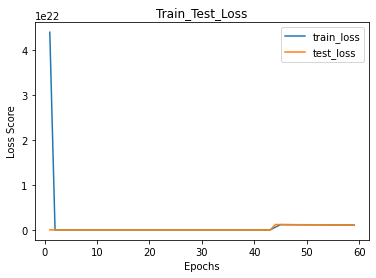

60
Train Epoch: 60 [0/7471 (0%)]	Loss: 152515.218750
Train Epoch: 60 [160/7471 (2%)]	Loss: 1527304329101312.000000
Train Epoch: 60 [320/7471 (4%)]	Loss: 1811734.000000
Train Epoch: 60 [480/7471 (6%)]	Loss: 138564.750000
Train Epoch: 60 [640/7471 (9%)]	Loss: 128869.265625
Train Epoch: 60 [800/7471 (11%)]	Loss: 186655.203125
Train Epoch: 60 [960/7471 (13%)]	Loss: 4947309.000000
Train Epoch: 60 [1120/7471 (15%)]	Loss: 3108349184.000000
Train Epoch: 60 [1280/7471 (17%)]	Loss: 183284.890625
Train Epoch: 60 [1440/7471 (19%)]	Loss: 96603.906250
Train Epoch: 60 [1600/7471 (21%)]	Loss: 105907.453125
Train Epoch: 60 [1760/7471 (24%)]	Loss: 243084.906250
Train Epoch: 60 [1920/7471 (26%)]	Loss: 2159264070666689708032.000000
Train Epoch: 60 [2080/7471 (28%)]	Loss: 247982000.000000
Train Epoch: 60 [2240/7471 (30%)]	Loss: 100833.023438
Train Epoch: 60 [2400/7471 (32%)]	Loss: 109206.492188
Train Epoch: 60 [2560/7471 (34%)]	Loss: 5419847.000000
Train Epoch: 60 [2720/7471 (36%)]	Loss: 689274560.000000
T

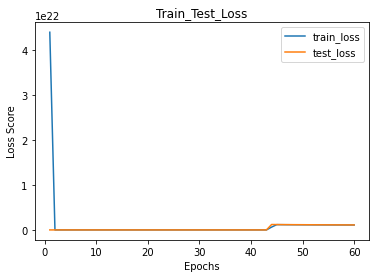

61
Train Epoch: 61 [0/7471 (0%)]	Loss: 1995361.000000
Train Epoch: 61 [160/7471 (2%)]	Loss: 5142637.500000
Train Epoch: 61 [320/7471 (4%)]	Loss: 2876360698858848649216.000000
Train Epoch: 61 [480/7471 (6%)]	Loss: 176634.031250
Train Epoch: 61 [640/7471 (9%)]	Loss: 3217057280.000000
Train Epoch: 61 [800/7471 (11%)]	Loss: 528956576.000000
Train Epoch: 61 [960/7471 (13%)]	Loss: 97111.226562
Train Epoch: 61 [1120/7471 (15%)]	Loss: 171262.187500
Train Epoch: 61 [1280/7471 (17%)]	Loss: 25485318600335283978240.000000
Train Epoch: 61 [1440/7471 (19%)]	Loss: 107488.203125
Train Epoch: 61 [1600/7471 (21%)]	Loss: 105047.640625
Train Epoch: 61 [1760/7471 (24%)]	Loss: 518588.187500
Train Epoch: 61 [1920/7471 (26%)]	Loss: 421626016.000000
Train Epoch: 61 [2080/7471 (28%)]	Loss: 1612640384.000000
Train Epoch: 61 [2240/7471 (30%)]	Loss: 12716009249372677079040.000000
Train Epoch: 61 [2400/7471 (32%)]	Loss: 12876505155193186287616.000000
Train Epoch: 61 [2560/7471 (34%)]	Loss: 173014540594087723008.000

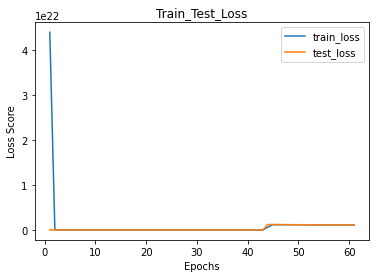

62
Train Epoch: 62 [0/7471 (0%)]	Loss: 297884.687500
Train Epoch: 62 [160/7471 (2%)]	Loss: 206149.062500
Train Epoch: 62 [320/7471 (4%)]	Loss: 26733934.000000
Train Epoch: 62 [480/7471 (6%)]	Loss: 220565504.000000
Train Epoch: 62 [640/7471 (9%)]	Loss: 97227.328125
Train Epoch: 62 [800/7471 (11%)]	Loss: 1639490816.000000
Train Epoch: 62 [960/7471 (13%)]	Loss: 2311221.500000
Train Epoch: 62 [1120/7471 (15%)]	Loss: 751945280.000000
Train Epoch: 62 [1280/7471 (17%)]	Loss: 23706130.000000
Train Epoch: 62 [1440/7471 (19%)]	Loss: 2445640.000000
Train Epoch: 62 [1600/7471 (21%)]	Loss: 188887.718750
Train Epoch: 62 [1760/7471 (24%)]	Loss: 84304.007812
Train Epoch: 62 [1920/7471 (26%)]	Loss: 110489.726562
Train Epoch: 62 [2080/7471 (28%)]	Loss: 40601796.000000
Train Epoch: 62 [2240/7471 (30%)]	Loss: 119160.156250
Train Epoch: 62 [2400/7471 (32%)]	Loss: 93379.945312
Train Epoch: 62 [2560/7471 (34%)]	Loss: 22776232.000000
Train Epoch: 62 [2720/7471 (36%)]	Loss: 90278.867188
Train Epoch: 62 [2880/7

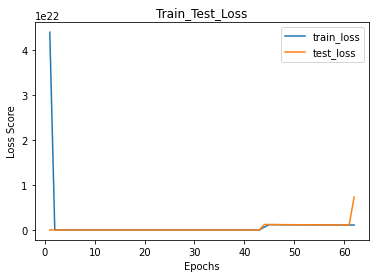

63
Train Epoch: 63 [0/7471 (0%)]	Loss: 148819.875000
Train Epoch: 63 [160/7471 (2%)]	Loss: 142671.531250
Train Epoch: 63 [320/7471 (4%)]	Loss: 117441.484375
Train Epoch: 63 [480/7471 (6%)]	Loss: 1349571072.000000
Train Epoch: 63 [640/7471 (9%)]	Loss: 159720912.000000
Train Epoch: 63 [800/7471 (11%)]	Loss: 314079.437500
Train Epoch: 63 [960/7471 (13%)]	Loss: 2338791.500000
Train Epoch: 63 [1120/7471 (15%)]	Loss: 108171.445312
Train Epoch: 63 [1280/7471 (17%)]	Loss: 146354.968750
Train Epoch: 63 [1440/7471 (19%)]	Loss: 1321236.750000
Train Epoch: 63 [1600/7471 (21%)]	Loss: 943860.500000
Train Epoch: 63 [1760/7471 (24%)]	Loss: 18352930715771703656448.000000
Train Epoch: 63 [1920/7471 (26%)]	Loss: 146977331192166088704.000000
Train Epoch: 63 [2080/7471 (28%)]	Loss: 3826618368.000000
Train Epoch: 63 [2240/7471 (30%)]	Loss: 104885.429688
Train Epoch: 63 [2400/7471 (32%)]	Loss: 1472046720.000000
Train Epoch: 63 [2560/7471 (34%)]	Loss: 125347.898438
Train Epoch: 63 [2720/7471 (36%)]	Loss: 2208

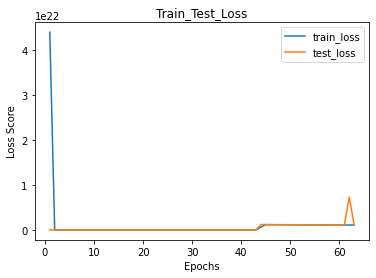

64
Train Epoch: 64 [0/7471 (0%)]	Loss: 7515645440.000000
Train Epoch: 64 [160/7471 (2%)]	Loss: 90536.632812
Train Epoch: 64 [320/7471 (4%)]	Loss: 2379312.250000
Train Epoch: 64 [480/7471 (6%)]	Loss: 116338752.000000
Train Epoch: 64 [640/7471 (9%)]	Loss: 2053103249925475401728.000000
Train Epoch: 64 [800/7471 (11%)]	Loss: 13137009120238991572992.000000
Train Epoch: 64 [960/7471 (13%)]	Loss: 151356.437500
Train Epoch: 64 [1120/7471 (15%)]	Loss: 5645804032.000000
Train Epoch: 64 [1280/7471 (17%)]	Loss: 155322630144.000000
Train Epoch: 64 [1440/7471 (19%)]	Loss: 6620701279800719835136.000000
Train Epoch: 64 [1600/7471 (21%)]	Loss: 194235.109375
Train Epoch: 64 [1760/7471 (24%)]	Loss: 93919.007812
Train Epoch: 64 [1920/7471 (26%)]	Loss: 104958.796875
Train Epoch: 64 [2080/7471 (28%)]	Loss: 147679.921875
Train Epoch: 64 [2240/7471 (30%)]	Loss: 147569.781250
Train Epoch: 64 [2400/7471 (32%)]	Loss: 629185.750000
Train Epoch: 64 [2560/7471 (34%)]	Loss: 95527.687500
Train Epoch: 64 [2720/7471 (3

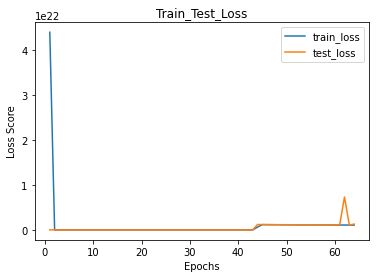

65
Train Epoch: 65 [0/7471 (0%)]	Loss: 1227955200.000000
Train Epoch: 65 [160/7471 (2%)]	Loss: 3143996416.000000
Train Epoch: 65 [320/7471 (4%)]	Loss: 829885.437500
Train Epoch: 65 [480/7471 (6%)]	Loss: 1512206.250000
Train Epoch: 65 [640/7471 (9%)]	Loss: 81416.953125
Train Epoch: 65 [800/7471 (11%)]	Loss: 86777.070312
Train Epoch: 65 [960/7471 (13%)]	Loss: 90026.062500
Train Epoch: 65 [1120/7471 (15%)]	Loss: 486008896.000000
Train Epoch: 65 [1280/7471 (17%)]	Loss: 181857056.000000
Train Epoch: 65 [1440/7471 (19%)]	Loss: 119645442450491703296.000000
Train Epoch: 65 [1600/7471 (21%)]	Loss: 6740475074840591597568.000000
Train Epoch: 65 [1760/7471 (24%)]	Loss: 165704073216.000000
Train Epoch: 65 [1920/7471 (26%)]	Loss: 82809.523438
Train Epoch: 65 [2080/7471 (28%)]	Loss: 7769049378985972072448.000000
Train Epoch: 65 [2240/7471 (30%)]	Loss: 1031823.812500
Train Epoch: 65 [2400/7471 (32%)]	Loss: 108998.593750
Train Epoch: 65 [2560/7471 (34%)]	Loss: 12751176732962906439680.000000
Train Epoch

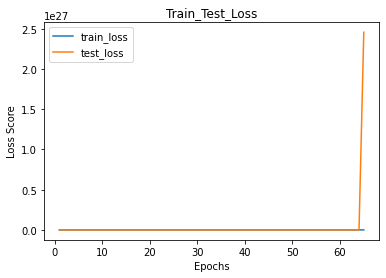

66
Train Epoch: 66 [0/7471 (0%)]	Loss: 95603.640625
Train Epoch: 66 [160/7471 (2%)]	Loss: 104514200.000000
Train Epoch: 66 [320/7471 (4%)]	Loss: 1298366336.000000
Train Epoch: 66 [480/7471 (6%)]	Loss: 7760577545136934748160.000000
Train Epoch: 66 [640/7471 (9%)]	Loss: 1964795120319622807552.000000
Train Epoch: 66 [800/7471 (11%)]	Loss: 2020317044638218190848.000000
Train Epoch: 66 [960/7471 (13%)]	Loss: 25920050036736.000000
Train Epoch: 66 [1120/7471 (15%)]	Loss: 949841.437500
Train Epoch: 66 [1280/7471 (17%)]	Loss: 207656.406250
Train Epoch: 66 [1440/7471 (19%)]	Loss: 103844.992188
Train Epoch: 66 [1600/7471 (21%)]	Loss: 135250.437500
Train Epoch: 66 [1760/7471 (24%)]	Loss: 1349904865689600.000000
Train Epoch: 66 [1920/7471 (26%)]	Loss: 134938272.000000
Train Epoch: 66 [2080/7471 (28%)]	Loss: 169952.750000
Train Epoch: 66 [2240/7471 (30%)]	Loss: 2051318276360664776704.000000
Train Epoch: 66 [2400/7471 (32%)]	Loss: 164748230656.000000
Train Epoch: 66 [2560/7471 (34%)]	Loss: 162355.031

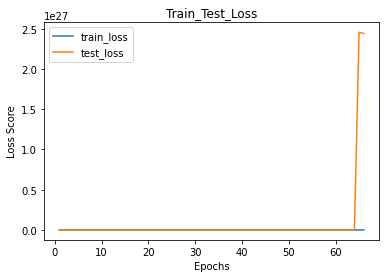

67
Train Epoch: 67 [0/7471 (0%)]	Loss: 164900454400.000000
Train Epoch: 67 [160/7471 (2%)]	Loss: 2152533.500000
Train Epoch: 67 [320/7471 (4%)]	Loss: 130238.710938
Train Epoch: 67 [480/7471 (6%)]	Loss: 230524.437500
Train Epoch: 67 [640/7471 (9%)]	Loss: 4942152277784487002112.000000
Train Epoch: 67 [800/7471 (11%)]	Loss: 90745.226562
Train Epoch: 67 [960/7471 (13%)]	Loss: 98383.843750
Train Epoch: 67 [1120/7471 (15%)]	Loss: 88402.328125
Train Epoch: 67 [1280/7471 (17%)]	Loss: 85474.703125
Train Epoch: 67 [1440/7471 (19%)]	Loss: 12201047401780811399168.000000
Train Epoch: 67 [1600/7471 (21%)]	Loss: 124289900544.000000
Train Epoch: 67 [1760/7471 (24%)]	Loss: 1417962112155648.000000
Train Epoch: 67 [1920/7471 (26%)]	Loss: 6853689377023198232576.000000
Train Epoch: 67 [2080/7471 (28%)]	Loss: 7640894.500000
Train Epoch: 67 [2240/7471 (30%)]	Loss: 5360970.500000
Train Epoch: 67 [2400/7471 (32%)]	Loss: 2582054122384883974144.000000
Train Epoch: 67 [2560/7471 (34%)]	Loss: 944179.125000
Train E

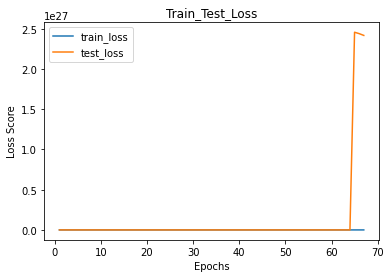

68
Train Epoch: 68 [0/7471 (0%)]	Loss: 113967.945312
Train Epoch: 68 [160/7471 (2%)]	Loss: 85324.984375
Train Epoch: 68 [320/7471 (4%)]	Loss: 451292256.000000
Train Epoch: 68 [480/7471 (6%)]	Loss: 13087316.000000
Train Epoch: 68 [640/7471 (9%)]	Loss: 245260730368.000000
Train Epoch: 68 [800/7471 (11%)]	Loss: 5109840432209906892800.000000
Train Epoch: 68 [960/7471 (13%)]	Loss: 2635543093684186644480.000000
Train Epoch: 68 [1120/7471 (15%)]	Loss: 85665.914062
Train Epoch: 68 [1280/7471 (17%)]	Loss: 113494.523438
Train Epoch: 68 [1440/7471 (19%)]	Loss: 4228053076619319836672.000000
Train Epoch: 68 [1600/7471 (21%)]	Loss: 32965638.000000
Train Epoch: 68 [1760/7471 (24%)]	Loss: 12455083071861805809664.000000
Train Epoch: 68 [1920/7471 (26%)]	Loss: 12742667181466989887488.000000
Train Epoch: 68 [2080/7471 (28%)]	Loss: 4220842409984.000000
Train Epoch: 68 [2240/7471 (30%)]	Loss: 176342663168.000000
Train Epoch: 68 [2400/7471 (32%)]	Loss: 194639248.000000
Train Epoch: 68 [2560/7471 (34%)]	Loss

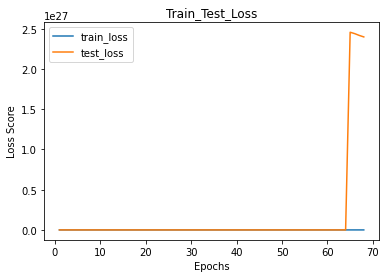

69
Train Epoch: 69 [0/7471 (0%)]	Loss: 674024.437500
Train Epoch: 69 [160/7471 (2%)]	Loss: 12476386223999175098368.000000
Train Epoch: 69 [320/7471 (4%)]	Loss: 127978.312500
Train Epoch: 69 [480/7471 (6%)]	Loss: 111741.718750
Train Epoch: 69 [640/7471 (9%)]	Loss: 6180713669955457908736.000000
Train Epoch: 69 [800/7471 (11%)]	Loss: 27951782.000000
Train Epoch: 69 [960/7471 (13%)]	Loss: 85528.695312
Train Epoch: 69 [1120/7471 (15%)]	Loss: 88396.281250
Train Epoch: 69 [1280/7471 (17%)]	Loss: 554955.000000
Train Epoch: 69 [1440/7471 (19%)]	Loss: 87754.250000
Train Epoch: 69 [1600/7471 (21%)]	Loss: 627337.625000
Train Epoch: 69 [1760/7471 (24%)]	Loss: 7968683254418191155200.000000
Train Epoch: 69 [1920/7471 (26%)]	Loss: 32021952512.000000
Train Epoch: 69 [2080/7471 (28%)]	Loss: 169282928640.000000
Train Epoch: 69 [2240/7471 (30%)]	Loss: 159886114816.000000
Train Epoch: 69 [2400/7471 (32%)]	Loss: 91198.226562
Train Epoch: 69 [2560/7471 (34%)]	Loss: 86090.898438
Train Epoch: 69 [2720/7471 (36

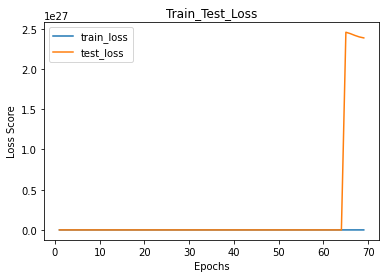

70
Train Epoch: 70 [0/7471 (0%)]	Loss: 85882.984375
Train Epoch: 70 [160/7471 (2%)]	Loss: 117817.468750
Train Epoch: 70 [320/7471 (4%)]	Loss: 5455854806330549207040.000000
Train Epoch: 70 [480/7471 (6%)]	Loss: 86655.515625
Train Epoch: 70 [640/7471 (9%)]	Loss: 7949554.000000
Train Epoch: 70 [800/7471 (11%)]	Loss: 87515.343750
Train Epoch: 70 [960/7471 (13%)]	Loss: 17457716.000000
Train Epoch: 70 [1120/7471 (15%)]	Loss: 86483.304688
Train Epoch: 70 [1280/7471 (17%)]	Loss: 2593445696167340933120.000000
Train Epoch: 70 [1440/7471 (19%)]	Loss: 85350.960938
Train Epoch: 70 [1600/7471 (21%)]	Loss: 12654262646681613893632.000000
Train Epoch: 70 [1760/7471 (24%)]	Loss: 83032.140625
Train Epoch: 70 [1920/7471 (26%)]	Loss: 1033259776.000000
Train Epoch: 70 [2080/7471 (28%)]	Loss: 37184177581326336.000000
Train Epoch: 70 [2240/7471 (30%)]	Loss: 84011.570312
Train Epoch: 70 [2400/7471 (32%)]	Loss: 12458457393882613153792.000000
Train Epoch: 70 [2560/7471 (34%)]	Loss: 1178363136.000000
Train Epoch:

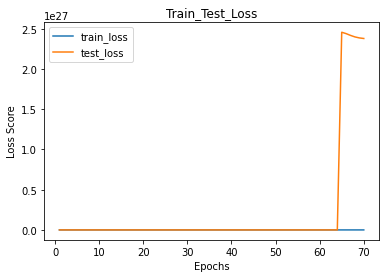

71
Train Epoch: 71 [0/7471 (0%)]	Loss: 89257.664062
Train Epoch: 71 [160/7471 (2%)]	Loss: 87961.078125
Train Epoch: 71 [320/7471 (4%)]	Loss: 168298.250000
Train Epoch: 71 [480/7471 (6%)]	Loss: 1092978.000000
Train Epoch: 71 [640/7471 (9%)]	Loss: 115247263997992370176.000000
Train Epoch: 71 [800/7471 (11%)]	Loss: 105067.640625
Train Epoch: 71 [960/7471 (13%)]	Loss: 835458.437500
Train Epoch: 71 [1120/7471 (15%)]	Loss: 4245994010159880339456.000000
Train Epoch: 71 [1280/7471 (17%)]	Loss: 304071.781250
Train Epoch: 71 [1440/7471 (19%)]	Loss: 144232431199748882432.000000
Train Epoch: 71 [1600/7471 (21%)]	Loss: 2351824640.000000
Train Epoch: 71 [1760/7471 (24%)]	Loss: 148437663744.000000
Train Epoch: 71 [1920/7471 (26%)]	Loss: 621678.875000
Train Epoch: 71 [2080/7471 (28%)]	Loss: 1969972608.000000
Train Epoch: 71 [2240/7471 (30%)]	Loss: 2568007113672138686464.000000
Train Epoch: 71 [2400/7471 (32%)]	Loss: 191328.375000
Train Epoch: 71 [2560/7471 (34%)]	Loss: 230534928.000000
Train Epoch: 71

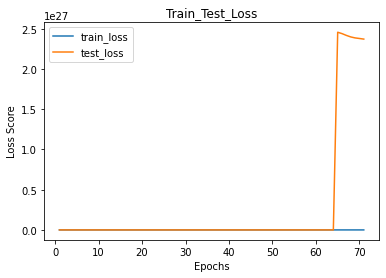

72
Train Epoch: 72 [0/7471 (0%)]	Loss: 105711.515625
Train Epoch: 72 [160/7471 (2%)]	Loss: 2587151352738137243648.000000
Train Epoch: 72 [320/7471 (4%)]	Loss: 4795436823873778089984.000000
Train Epoch: 72 [480/7471 (6%)]	Loss: 103648.421875
Train Epoch: 72 [640/7471 (9%)]	Loss: 102137.273438
Train Epoch: 72 [800/7471 (11%)]	Loss: 712264512.000000
Train Epoch: 72 [960/7471 (13%)]	Loss: 102283.828125
Train Epoch: 72 [1120/7471 (15%)]	Loss: 5102691530751409651712.000000
Train Epoch: 72 [1280/7471 (17%)]	Loss: 8538992.000000
Train Epoch: 72 [1440/7471 (19%)]	Loss: 115076.789062
Train Epoch: 72 [1600/7471 (21%)]	Loss: 87024.250000
Train Epoch: 72 [1760/7471 (24%)]	Loss: 7752588159397979488256.000000
Train Epoch: 72 [1920/7471 (26%)]	Loss: 382652.125000
Train Epoch: 72 [2080/7471 (28%)]	Loss: 303672.375000
Train Epoch: 72 [2240/7471 (30%)]	Loss: 366033.562500
Train Epoch: 72 [2400/7471 (32%)]	Loss: 123490.078125
Train Epoch: 72 [2560/7471 (34%)]	Loss: 93887.171875
Train Epoch: 72 [2720/7471 

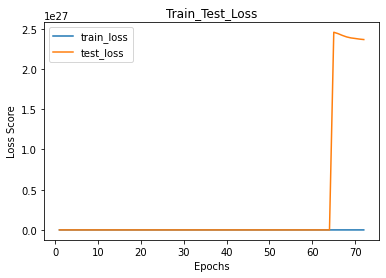

73
Train Epoch: 73 [0/7471 (0%)]	Loss: 597478848.000000
Train Epoch: 73 [160/7471 (2%)]	Loss: 237294976.000000
Train Epoch: 73 [320/7471 (4%)]	Loss: 112818.921875
Train Epoch: 73 [480/7471 (6%)]	Loss: 164752261120.000000
Train Epoch: 73 [640/7471 (9%)]	Loss: 4192078885745837735936.000000
Train Epoch: 73 [800/7471 (11%)]	Loss: 119421546698704420864.000000
Train Epoch: 73 [960/7471 (13%)]	Loss: 114862795568084680704.000000
Train Epoch: 73 [1120/7471 (15%)]	Loss: 8516629.000000
Train Epoch: 73 [1280/7471 (17%)]	Loss: 85990864.000000
Train Epoch: 73 [1440/7471 (19%)]	Loss: 150489648.000000
Train Epoch: 73 [1600/7471 (21%)]	Loss: 899342.250000
Train Epoch: 73 [1760/7471 (24%)]	Loss: 109299.500000
Train Epoch: 73 [1920/7471 (26%)]	Loss: 102593.281250
Train Epoch: 73 [2080/7471 (28%)]	Loss: 21786386432.000000
Train Epoch: 73 [2240/7471 (30%)]	Loss: 95301.937500
Train Epoch: 73 [2400/7471 (32%)]	Loss: 84053.890625
Train Epoch: 73 [2560/7471 (34%)]	Loss: 83919.648438
Train Epoch: 73 [2720/7471 

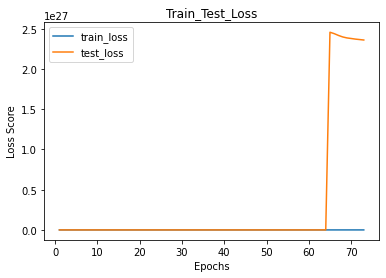

74
Train Epoch: 74 [0/7471 (0%)]	Loss: 163155836928.000000
Train Epoch: 74 [160/7471 (2%)]	Loss: 3946819072.000000
Train Epoch: 74 [320/7471 (4%)]	Loss: 7888203366127126970368.000000
Train Epoch: 74 [480/7471 (6%)]	Loss: 196872.031250
Train Epoch: 74 [640/7471 (9%)]	Loss: 8504417792.000000
Train Epoch: 74 [800/7471 (11%)]	Loss: 13725364224.000000
Train Epoch: 74 [960/7471 (13%)]	Loss: 1428836.750000
Train Epoch: 74 [1120/7471 (15%)]	Loss: 4234121958592178290688.000000
Train Epoch: 74 [1280/7471 (17%)]	Loss: 163719610368.000000
Train Epoch: 74 [1440/7471 (19%)]	Loss: 7749187941679314763776.000000
Train Epoch: 74 [1600/7471 (21%)]	Loss: 105977.539062
Train Epoch: 74 [1760/7471 (24%)]	Loss: 100602.726562
Train Epoch: 74 [1920/7471 (26%)]	Loss: 95731.031250
Train Epoch: 74 [2080/7471 (28%)]	Loss: 84878824.000000
Train Epoch: 74 [2240/7471 (30%)]	Loss: 103159.000000
Train Epoch: 74 [2400/7471 (32%)]	Loss: 277930.187500
Train Epoch: 74 [2560/7471 (34%)]	Loss: 1304551.250000
Train Epoch: 74 [

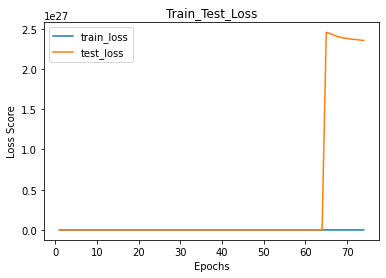

75
Train Epoch: 75 [0/7471 (0%)]	Loss: 265946218496.000000
Train Epoch: 75 [160/7471 (2%)]	Loss: 2595890587815049691136.000000
Train Epoch: 75 [320/7471 (4%)]	Loss: 1281659.500000
Train Epoch: 75 [480/7471 (6%)]	Loss: 12372873238363877933056.000000
Train Epoch: 75 [640/7471 (9%)]	Loss: 84788.359375
Train Epoch: 75 [800/7471 (11%)]	Loss: 83458.968750
Train Epoch: 75 [960/7471 (13%)]	Loss: 247589584896.000000
Train Epoch: 75 [1120/7471 (15%)]	Loss: 182227712.000000
Train Epoch: 75 [1280/7471 (17%)]	Loss: 84816.398438
Train Epoch: 75 [1440/7471 (19%)]	Loss: 448824480.000000
Train Epoch: 75 [1600/7471 (21%)]	Loss: 723578432.000000
Train Epoch: 75 [1760/7471 (24%)]	Loss: 2897963.750000
Train Epoch: 75 [1920/7471 (26%)]	Loss: 122597.250000
Train Epoch: 75 [2080/7471 (28%)]	Loss: 160051.875000
Train Epoch: 75 [2240/7471 (30%)]	Loss: 22635061248.000000
Train Epoch: 75 [2400/7471 (32%)]	Loss: 1080176.500000
Train Epoch: 75 [2560/7471 (34%)]	Loss: 12193650239392855359488.000000
Train Epoch: 75 [

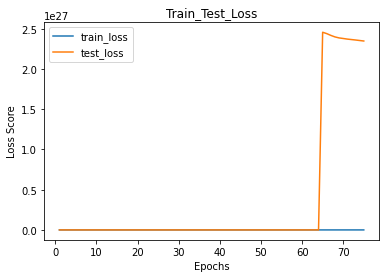

76
Train Epoch: 76 [0/7471 (0%)]	Loss: 434482752.000000
Train Epoch: 76 [160/7471 (2%)]	Loss: 199975.031250
Train Epoch: 76 [320/7471 (4%)]	Loss: 655622.687500
Train Epoch: 76 [480/7471 (6%)]	Loss: 598635.312500
Train Epoch: 76 [640/7471 (9%)]	Loss: 1342454708043776.000000
Train Epoch: 76 [800/7471 (11%)]	Loss: 163461.750000
Train Epoch: 76 [960/7471 (13%)]	Loss: 102920.937500
Train Epoch: 76 [1120/7471 (15%)]	Loss: 291125856.000000
Train Epoch: 76 [1280/7471 (17%)]	Loss: 169750.375000
Train Epoch: 76 [1440/7471 (19%)]	Loss: 116181.156250
Train Epoch: 76 [1600/7471 (21%)]	Loss: 131700816.000000
Train Epoch: 76 [1760/7471 (24%)]	Loss: 88360.335938
Train Epoch: 76 [1920/7471 (26%)]	Loss: 10671936765952.000000
Train Epoch: 76 [2080/7471 (28%)]	Loss: 265710928.000000
Train Epoch: 76 [2240/7471 (30%)]	Loss: 7817685440211806322688.000000
Train Epoch: 76 [2400/7471 (32%)]	Loss: 401410656.000000
Train Epoch: 76 [2560/7471 (34%)]	Loss: 1904127.625000
Train Epoch: 76 [2720/7471 (36%)]	Loss: 1012

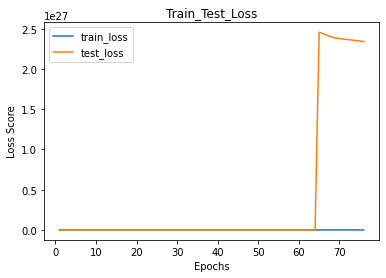

77
Train Epoch: 77 [0/7471 (0%)]	Loss: 106133.609375
Train Epoch: 77 [160/7471 (2%)]	Loss: 79326544.000000
Train Epoch: 77 [320/7471 (4%)]	Loss: 3317864895878627590144.000000
Train Epoch: 77 [480/7471 (6%)]	Loss: 146419531776.000000
Train Epoch: 77 [640/7471 (9%)]	Loss: 11504884349081600655360.000000
Train Epoch: 77 [800/7471 (11%)]	Loss: 161541.265625
Train Epoch: 77 [960/7471 (13%)]	Loss: 92850.023438
Train Epoch: 77 [1120/7471 (15%)]	Loss: 89890.687500
Train Epoch: 77 [1280/7471 (17%)]	Loss: 523030912.000000
Train Epoch: 77 [1440/7471 (19%)]	Loss: 8305803264.000000
Train Epoch: 77 [1600/7471 (21%)]	Loss: 88332.734375
Train Epoch: 77 [1760/7471 (24%)]	Loss: 156211.406250
Train Epoch: 77 [1920/7471 (26%)]	Loss: 7487153315710156931072.000000
Train Epoch: 77 [2080/7471 (28%)]	Loss: 87390.203125
Train Epoch: 77 [2240/7471 (30%)]	Loss: 382383488.000000
Train Epoch: 77 [2400/7471 (32%)]	Loss: 12684856724850248515584.000000
Train Epoch: 77 [2560/7471 (34%)]	Loss: 115598184129113358336.00000

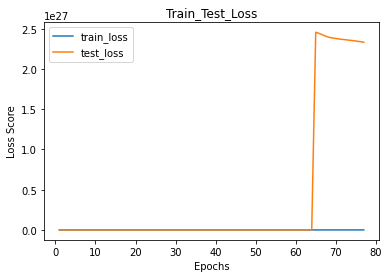

78
Train Epoch: 78 [0/7471 (0%)]	Loss: 2016508032.000000
Train Epoch: 78 [160/7471 (2%)]	Loss: 88200.796875
Train Epoch: 78 [320/7471 (4%)]	Loss: 114945637172167835648.000000
Train Epoch: 78 [480/7471 (6%)]	Loss: 405930688.000000
Train Epoch: 78 [640/7471 (9%)]	Loss: 1402624381288448.000000
Train Epoch: 78 [800/7471 (11%)]	Loss: 223436.468750
Train Epoch: 78 [960/7471 (13%)]	Loss: 2014529637642070392832.000000
Train Epoch: 78 [1120/7471 (15%)]	Loss: 207729.843750
Train Epoch: 78 [1280/7471 (17%)]	Loss: 2564894000429718831104.000000
Train Epoch: 78 [1440/7471 (19%)]	Loss: 129395.953125
Train Epoch: 78 [1600/7471 (21%)]	Loss: 86809.343750
Train Epoch: 78 [1760/7471 (24%)]	Loss: 29969416192.000000
Train Epoch: 78 [1920/7471 (26%)]	Loss: 664619392.000000
Train Epoch: 78 [2080/7471 (28%)]	Loss: 2598892518441668837376.000000
Train Epoch: 78 [2240/7471 (30%)]	Loss: 59055232.000000
Train Epoch: 78 [2400/7471 (32%)]	Loss: 90689.250000
Train Epoch: 78 [2560/7471 (34%)]	Loss: 516161152.000000
Tra

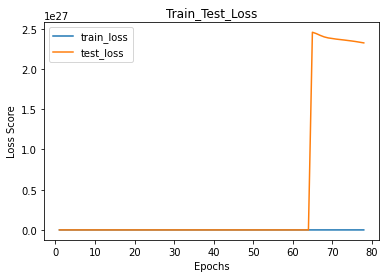

79
Train Epoch: 79 [0/7471 (0%)]	Loss: 29427804.000000
Train Epoch: 79 [160/7471 (2%)]	Loss: 960795.812500
Train Epoch: 79 [320/7471 (4%)]	Loss: 97236.148438
Train Epoch: 79 [480/7471 (6%)]	Loss: 205188.437500
Train Epoch: 79 [640/7471 (9%)]	Loss: 97763.656250
Train Epoch: 79 [800/7471 (11%)]	Loss: 2011043710792997273600.000000
Train Epoch: 79 [960/7471 (13%)]	Loss: 627794.812500
Train Epoch: 79 [1120/7471 (15%)]	Loss: 25392460.000000
Train Epoch: 79 [1280/7471 (17%)]	Loss: 69531288.000000
Train Epoch: 79 [1440/7471 (19%)]	Loss: 2132400144384.000000
Train Epoch: 79 [1600/7471 (21%)]	Loss: 12731783107067542241280.000000
Train Epoch: 79 [1760/7471 (24%)]	Loss: 560934720.000000
Train Epoch: 79 [1920/7471 (26%)]	Loss: 2750932.750000
Train Epoch: 79 [2080/7471 (28%)]	Loss: 1185201.000000
Train Epoch: 79 [2240/7471 (30%)]	Loss: 573932.625000
Train Epoch: 79 [2400/7471 (32%)]	Loss: 112563936656730619904.000000
Train Epoch: 79 [2560/7471 (34%)]	Loss: 115622.367188
Train Epoch: 79 [2720/7471 (3

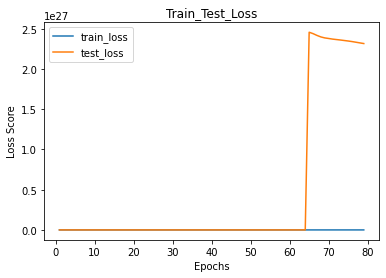

80
Train Epoch: 80 [0/7471 (0%)]	Loss: 93974.250000
Train Epoch: 80 [160/7471 (2%)]	Loss: 415347680.000000
Train Epoch: 80 [320/7471 (4%)]	Loss: 1924051.375000
Train Epoch: 80 [480/7471 (6%)]	Loss: 164095904.000000
Train Epoch: 80 [640/7471 (9%)]	Loss: 91643.046875
Train Epoch: 80 [800/7471 (11%)]	Loss: 101100.859375
Train Epoch: 80 [960/7471 (13%)]	Loss: 96926.484375
Train Epoch: 80 [1120/7471 (15%)]	Loss: 4229053438686549508096.000000
Train Epoch: 80 [1280/7471 (17%)]	Loss: 1500663.625000
Train Epoch: 80 [1440/7471 (19%)]	Loss: 549623872.000000
Train Epoch: 80 [1600/7471 (21%)]	Loss: 83978.789062
Train Epoch: 80 [1760/7471 (24%)]	Loss: 975587.312500
Train Epoch: 80 [1920/7471 (26%)]	Loss: 126390784.000000
Train Epoch: 80 [2080/7471 (28%)]	Loss: 142263.484375
Train Epoch: 80 [2240/7471 (30%)]	Loss: 5539031040.000000
Train Epoch: 80 [2400/7471 (32%)]	Loss: 207411740672.000000
Train Epoch: 80 [2560/7471 (34%)]	Loss: 93306.593750
Train Epoch: 80 [2720/7471 (36%)]	Loss: 86107.906250
Train

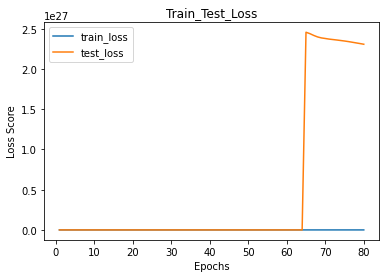

81
Train Epoch: 81 [0/7471 (0%)]	Loss: 148017.906250
Train Epoch: 81 [160/7471 (2%)]	Loss: 273069024.000000
Train Epoch: 81 [320/7471 (4%)]	Loss: 900823808.000000
Train Epoch: 81 [480/7471 (6%)]	Loss: 4293161053482261676032.000000
Train Epoch: 81 [640/7471 (9%)]	Loss: 212603.593750
Train Epoch: 81 [800/7471 (11%)]	Loss: 157427.250000
Train Epoch: 81 [960/7471 (13%)]	Loss: 253788.281250
Train Epoch: 81 [1120/7471 (15%)]	Loss: 12569683919779689136128.000000
Train Epoch: 81 [1280/7471 (17%)]	Loss: 1257035392.000000
Train Epoch: 81 [1440/7471 (19%)]	Loss: 2588365635787667013632.000000
Train Epoch: 81 [1600/7471 (21%)]	Loss: 207122720.000000
Train Epoch: 81 [1760/7471 (24%)]	Loss: 12613056961890987540480.000000
Train Epoch: 81 [1920/7471 (26%)]	Loss: 141949739507369639936.000000
Train Epoch: 81 [2080/7471 (28%)]	Loss: 882745600.000000
Train Epoch: 81 [2240/7471 (30%)]	Loss: 21686845440.000000
Train Epoch: 81 [2400/7471 (32%)]	Loss: 146504237056.000000
Train Epoch: 81 [2560/7471 (34%)]	Loss:

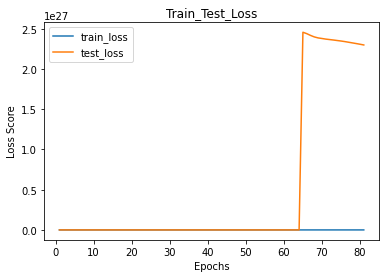

82
Train Epoch: 82 [0/7471 (0%)]	Loss: 1898240512.000000
Train Epoch: 82 [160/7471 (2%)]	Loss: 89757.687500
Train Epoch: 82 [320/7471 (4%)]	Loss: 1062556928.000000
Train Epoch: 82 [480/7471 (6%)]	Loss: 304698556416.000000
Train Epoch: 82 [640/7471 (9%)]	Loss: 95185.898438
Train Epoch: 82 [800/7471 (11%)]	Loss: 873899584.000000
Train Epoch: 82 [960/7471 (13%)]	Loss: 112051432296791670784.000000
Train Epoch: 82 [1120/7471 (15%)]	Loss: 113159256232473657344.000000
Train Epoch: 82 [1280/7471 (17%)]	Loss: 2008421771384937512960.000000
Train Epoch: 82 [1440/7471 (19%)]	Loss: 96090.375000
Train Epoch: 82 [1600/7471 (21%)]	Loss: 114184766329653821440.000000
Train Epoch: 82 [1760/7471 (24%)]	Loss: 2124623.000000
Train Epoch: 82 [1920/7471 (26%)]	Loss: 1527349.000000
Train Epoch: 82 [2080/7471 (28%)]	Loss: 393209.000000
Train Epoch: 82 [2240/7471 (30%)]	Loss: 162631.812500
Train Epoch: 82 [2400/7471 (32%)]	Loss: 9543794.000000
Train Epoch: 82 [2560/7471 (34%)]	Loss: 104252.359375
Train Epoch: 82

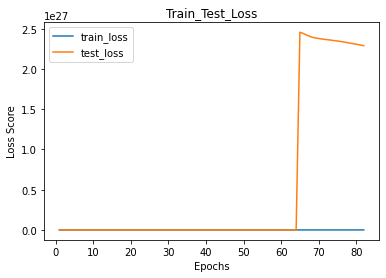

83
Train Epoch: 83 [0/7471 (0%)]	Loss: 83216.984375
Train Epoch: 83 [160/7471 (2%)]	Loss: 248336192.000000
Train Epoch: 83 [320/7471 (4%)]	Loss: 6226362718728438677504.000000
Train Epoch: 83 [480/7471 (6%)]	Loss: 264571944960.000000
Train Epoch: 83 [640/7471 (9%)]	Loss: 115920.054688
Train Epoch: 83 [800/7471 (11%)]	Loss: 101407.984375
Train Epoch: 83 [960/7471 (13%)]	Loss: 118986112.000000
Train Epoch: 83 [1120/7471 (15%)]	Loss: 12443844608.000000
Train Epoch: 83 [1280/7471 (17%)]	Loss: 898205440.000000
Train Epoch: 83 [1440/7471 (19%)]	Loss: 1433683.125000
Train Epoch: 83 [1600/7471 (21%)]	Loss: 676074.625000
Train Epoch: 83 [1760/7471 (24%)]	Loss: 267599296.000000
Train Epoch: 83 [1920/7471 (26%)]	Loss: 11666891776.000000
Train Epoch: 83 [2080/7471 (28%)]	Loss: 145756.281250
Train Epoch: 83 [2240/7471 (30%)]	Loss: 988375808.000000
Train Epoch: 83 [2400/7471 (32%)]	Loss: 187393.437500
Train Epoch: 83 [2560/7471 (34%)]	Loss: 153983188992.000000
Train Epoch: 83 [2720/7471 (36%)]	Loss: 

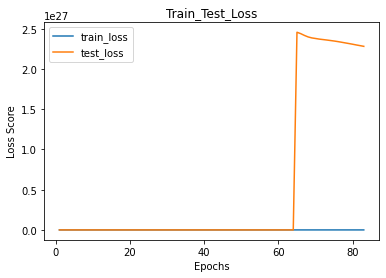

84
Train Epoch: 84 [0/7471 (0%)]	Loss: 109011.281250
Train Epoch: 84 [160/7471 (2%)]	Loss: 7944160028547251961856.000000
Train Epoch: 84 [320/7471 (4%)]	Loss: 10391565247798036135936.000000
Train Epoch: 84 [480/7471 (6%)]	Loss: 4913728934636244959232.000000
Train Epoch: 84 [640/7471 (9%)]	Loss: 129573.562500
Train Epoch: 84 [800/7471 (11%)]	Loss: 767851.937500
Train Epoch: 84 [960/7471 (13%)]	Loss: 3049393152.000000
Train Epoch: 84 [1120/7471 (15%)]	Loss: 179820.656250
Train Epoch: 84 [1280/7471 (17%)]	Loss: 183898.281250
Train Epoch: 84 [1440/7471 (19%)]	Loss: 85910.062500
Train Epoch: 84 [1600/7471 (21%)]	Loss: 90118.343750
Train Epoch: 84 [1760/7471 (24%)]	Loss: 709192.187500
Train Epoch: 84 [1920/7471 (26%)]	Loss: 266812.062500
Train Epoch: 84 [2080/7471 (28%)]	Loss: 4277728624934146539520.000000
Train Epoch: 84 [2240/7471 (30%)]	Loss: 116871.039062
Train Epoch: 84 [2400/7471 (32%)]	Loss: 85808.921875
Train Epoch: 84 [2560/7471 (34%)]	Loss: 87618.796875
Train Epoch: 84 [2720/7471 (

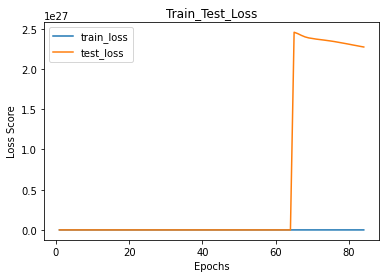

85
Train Epoch: 85 [0/7471 (0%)]	Loss: 91683.625000
Train Epoch: 85 [160/7471 (2%)]	Loss: 428392.937500
Train Epoch: 85 [320/7471 (4%)]	Loss: 88511.507812
Train Epoch: 85 [480/7471 (6%)]	Loss: 1403662689632256.000000
Train Epoch: 85 [640/7471 (9%)]	Loss: 11481734721097009463296.000000
Train Epoch: 85 [800/7471 (11%)]	Loss: 108635.375000
Train Epoch: 85 [960/7471 (13%)]	Loss: 786473.125000
Train Epoch: 85 [1120/7471 (15%)]	Loss: 19657181184.000000
Train Epoch: 85 [1280/7471 (17%)]	Loss: 12321722479696110682112.000000
Train Epoch: 85 [1440/7471 (19%)]	Loss: 498867424.000000
Train Epoch: 85 [1600/7471 (21%)]	Loss: 186730304.000000
Train Epoch: 85 [1760/7471 (24%)]	Loss: 15179085306476850315264.000000
Train Epoch: 85 [1920/7471 (26%)]	Loss: 156216.515625
Train Epoch: 85 [2080/7471 (28%)]	Loss: 762477.312500
Train Epoch: 85 [2240/7471 (30%)]	Loss: 107993.000000
Train Epoch: 85 [2400/7471 (32%)]	Loss: 87852.625000
Train Epoch: 85 [2560/7471 (34%)]	Loss: 86877.875000
Train Epoch: 85 [2720/747

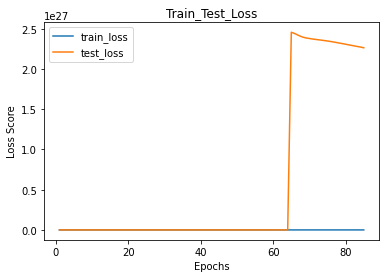

86
Train Epoch: 86 [0/7471 (0%)]	Loss: 95036.125000
Train Epoch: 86 [160/7471 (2%)]	Loss: 171594896.000000
Train Epoch: 86 [320/7471 (4%)]	Loss: 1109449600.000000
Train Epoch: 86 [480/7471 (6%)]	Loss: 94873.968750
Train Epoch: 86 [640/7471 (9%)]	Loss: 2023339.250000
Train Epoch: 86 [800/7471 (11%)]	Loss: 540714.187500
Train Epoch: 86 [960/7471 (13%)]	Loss: 275741.968750
Train Epoch: 86 [1120/7471 (15%)]	Loss: 135070.843750
Train Epoch: 86 [1280/7471 (17%)]	Loss: 103334.984375
Train Epoch: 86 [1440/7471 (19%)]	Loss: 3014109184.000000
Train Epoch: 86 [1600/7471 (21%)]	Loss: 117550353830090113024.000000
Train Epoch: 86 [1760/7471 (24%)]	Loss: 2860036352.000000
Train Epoch: 86 [1920/7471 (26%)]	Loss: 129000.859375
Train Epoch: 86 [2080/7471 (28%)]	Loss: 94458.710938
Train Epoch: 86 [2240/7471 (30%)]	Loss: 11972447232.000000
Train Epoch: 86 [2400/7471 (32%)]	Loss: 88745.132812
Train Epoch: 86 [2560/7471 (34%)]	Loss: 22143023104.000000
Train Epoch: 86 [2720/7471 (36%)]	Loss: 126402.085938
Tr

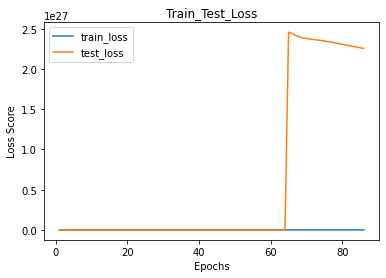

87
Train Epoch: 87 [0/7471 (0%)]	Loss: 407597.250000
Train Epoch: 87 [160/7471 (2%)]	Loss: 90773.296875
Train Epoch: 87 [320/7471 (4%)]	Loss: 161417265152.000000
Train Epoch: 87 [480/7471 (6%)]	Loss: 146699.968750
Train Epoch: 87 [640/7471 (9%)]	Loss: 156365.125000
Train Epoch: 87 [800/7471 (11%)]	Loss: 88064.226562
Train Epoch: 87 [960/7471 (13%)]	Loss: 2513069109192729559040.000000
Train Epoch: 87 [1120/7471 (15%)]	Loss: 91155.289062
Train Epoch: 87 [1280/7471 (17%)]	Loss: 764843.375000
Train Epoch: 87 [1440/7471 (19%)]	Loss: 2037444515496084897792.000000
Train Epoch: 87 [1600/7471 (21%)]	Loss: 11430366.000000
Train Epoch: 87 [1760/7471 (24%)]	Loss: 2566714580579083354112.000000
Train Epoch: 87 [1920/7471 (26%)]	Loss: 2543526390522682802176.000000
Train Epoch: 87 [2080/7471 (28%)]	Loss: 111627.531250
Train Epoch: 87 [2240/7471 (30%)]	Loss: 787282944.000000
Train Epoch: 87 [2400/7471 (32%)]	Loss: 20651440128.000000
Train Epoch: 87 [2560/7471 (34%)]	Loss: 188426372513792.000000
Train E

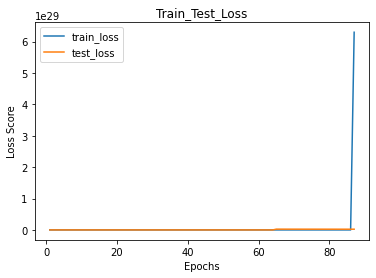

88
Train Epoch: 88 [0/7471 (0%)]	Loss: 2564463625190328238080.000000
Train Epoch: 88 [160/7471 (2%)]	Loss: 12436091392233184428032.000000
Train Epoch: 88 [320/7471 (4%)]	Loss: 190450.312500
Train Epoch: 88 [480/7471 (6%)]	Loss: 137478.437500
Train Epoch: 88 [640/7471 (9%)]	Loss: 2012801240547578609664.000000
Train Epoch: 88 [800/7471 (11%)]	Loss: 2690264576.000000
Train Epoch: 88 [960/7471 (13%)]	Loss: 5476179.000000
Train Epoch: 88 [1120/7471 (15%)]	Loss: 95050.062500
Train Epoch: 88 [1280/7471 (17%)]	Loss: 3263225536349508468736.000000
Train Epoch: 88 [1440/7471 (19%)]	Loss: 152207424.000000
Train Epoch: 88 [1600/7471 (21%)]	Loss: 172209136.000000
Train Epoch: 88 [1760/7471 (24%)]	Loss: 169593664.000000
Train Epoch: 88 [1920/7471 (26%)]	Loss: 90857.445312
Train Epoch: 88 [2080/7471 (28%)]	Loss: 62638904.000000
Train Epoch: 88 [2240/7471 (30%)]	Loss: 99532.906250
Train Epoch: 88 [2400/7471 (32%)]	Loss: 87042.656250
Train Epoch: 88 [2560/7471 (34%)]	Loss: 553240.687500
Train Epoch: 88 

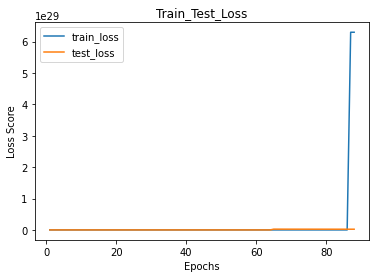

89
Train Epoch: 89 [0/7471 (0%)]	Loss: 11433307514303894519808.000000
Train Epoch: 89 [160/7471 (2%)]	Loss: 3261719363749129748480.000000
Train Epoch: 89 [320/7471 (4%)]	Loss: 19280864767894095921152.000000
Train Epoch: 89 [480/7471 (6%)]	Loss: 677865408.000000
Train Epoch: 89 [640/7471 (9%)]	Loss: 6222658508034926444544.000000
Train Epoch: 89 [800/7471 (11%)]	Loss: 9883795456.000000
Train Epoch: 89 [960/7471 (13%)]	Loss: 159831.906250
Train Epoch: 89 [1120/7471 (15%)]	Loss: 2012171862499653582848.000000
Train Epoch: 89 [1280/7471 (17%)]	Loss: 89573.781250
Train Epoch: 89 [1440/7471 (19%)]	Loss: 47062072.000000
Train Epoch: 89 [1600/7471 (21%)]	Loss: 160601.218750
Train Epoch: 89 [1760/7471 (24%)]	Loss: 88951.000000
Train Epoch: 89 [1920/7471 (26%)]	Loss: 5088636922214293176320.000000
Train Epoch: 89 [2080/7471 (28%)]	Loss: 2003608549283185295360.000000
Train Epoch: 89 [2240/7471 (30%)]	Loss: 938271.562500
Train Epoch: 89 [2400/7471 (32%)]	Loss: 132660.890625
Train Epoch: 89 [2560/7471

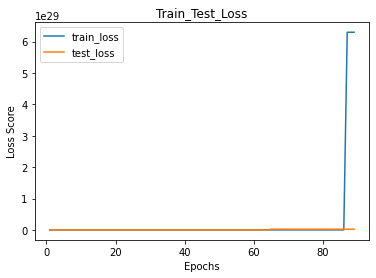

90
Train Epoch: 90 [0/7471 (0%)]	Loss: 1396942944862208.000000
Train Epoch: 90 [160/7471 (2%)]	Loss: 211477.046875
Train Epoch: 90 [320/7471 (4%)]	Loss: 6590890265017294258176.000000
Train Epoch: 90 [480/7471 (6%)]	Loss: 845395072.000000
Train Epoch: 90 [640/7471 (9%)]	Loss: 145122736.000000
Train Epoch: 90 [800/7471 (11%)]	Loss: 88015.062500
Train Epoch: 90 [960/7471 (13%)]	Loss: 143720153088.000000
Train Epoch: 90 [1120/7471 (15%)]	Loss: 100237.546875
Train Epoch: 90 [1280/7471 (17%)]	Loss: 158606.250000
Train Epoch: 90 [1440/7471 (19%)]	Loss: 155991277568.000000
Train Epoch: 90 [1600/7471 (21%)]	Loss: 5420650730993347461120.000000
Train Epoch: 90 [1760/7471 (24%)]	Loss: 11432741186650752679936.000000
Train Epoch: 90 [1920/7471 (26%)]	Loss: 159462.187500
Train Epoch: 90 [2080/7471 (28%)]	Loss: 347000128.000000
Train Epoch: 90 [2240/7471 (30%)]	Loss: 97873.960938
Train Epoch: 90 [2400/7471 (32%)]	Loss: 7806511446586346700800.000000
Train Epoch: 90 [2560/7471 (34%)]	Loss: 11646692352.0

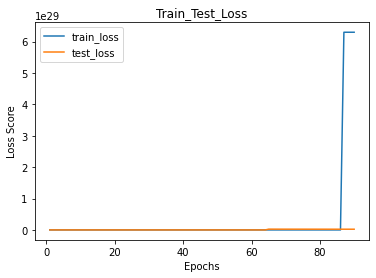

91
Train Epoch: 91 [0/7471 (0%)]	Loss: 64503720.000000
Train Epoch: 91 [160/7471 (2%)]	Loss: 637145.750000
Train Epoch: 91 [320/7471 (4%)]	Loss: 11139053573650574737408.000000
Train Epoch: 91 [480/7471 (6%)]	Loss: 14959352.000000
Train Epoch: 91 [640/7471 (9%)]	Loss: 92305.695312
Train Epoch: 91 [800/7471 (11%)]	Loss: 87611.523438
Train Epoch: 91 [960/7471 (13%)]	Loss: 91063.078125
Train Epoch: 91 [1120/7471 (15%)]	Loss: 87774.789062
Train Epoch: 91 [1280/7471 (17%)]	Loss: 164846336.000000
Train Epoch: 91 [1440/7471 (19%)]	Loss: 113587406060329631744.000000
Train Epoch: 91 [1600/7471 (21%)]	Loss: 94241.867188
Train Epoch: 91 [1760/7471 (24%)]	Loss: 126670.664062
Train Epoch: 91 [1920/7471 (26%)]	Loss: 96441912.000000
Train Epoch: 91 [2080/7471 (28%)]	Loss: 95475.867188
Train Epoch: 91 [2240/7471 (30%)]	Loss: 2003211106616069849088.000000
Train Epoch: 91 [2400/7471 (32%)]	Loss: 659809.187500
Train Epoch: 91 [2560/7471 (34%)]	Loss: 119642.117188
Train Epoch: 91 [2720/7471 (36%)]	Loss: 13

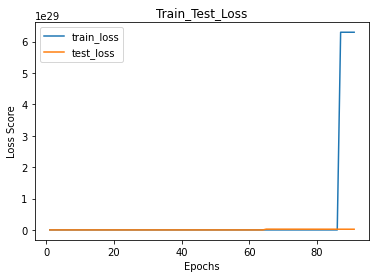

92
Train Epoch: 92 [0/7471 (0%)]	Loss: 609880.625000
Train Epoch: 92 [160/7471 (2%)]	Loss: 90899.453125
Train Epoch: 92 [320/7471 (4%)]	Loss: 10751029.000000
Train Epoch: 92 [480/7471 (6%)]	Loss: 1405835808866304.000000
Train Epoch: 92 [640/7471 (9%)]	Loss: 3551845376.000000
Train Epoch: 92 [800/7471 (11%)]	Loss: 102157.828125
Train Epoch: 92 [960/7471 (13%)]	Loss: 149010736.000000
Train Epoch: 92 [1120/7471 (15%)]	Loss: 89840.710938
Train Epoch: 92 [1280/7471 (17%)]	Loss: 110507990650277855232.000000
Train Epoch: 92 [1440/7471 (19%)]	Loss: 1847840.500000
Train Epoch: 92 [1600/7471 (21%)]	Loss: 12604591320491437850624.000000
Train Epoch: 92 [1760/7471 (24%)]	Loss: 349676.250000
Train Epoch: 92 [1920/7471 (26%)]	Loss: 170072.656250
Train Epoch: 92 [2080/7471 (28%)]	Loss: 108158.679688
Train Epoch: 92 [2240/7471 (30%)]	Loss: 235915378688.000000
Train Epoch: 92 [2400/7471 (32%)]	Loss: 106146.414062
Train Epoch: 92 [2560/7471 (34%)]	Loss: 112741309872523444224.000000
Train Epoch: 92 [2720/

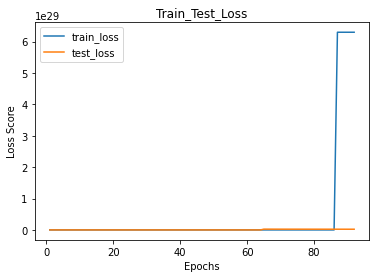

93
Train Epoch: 93 [0/7471 (0%)]	Loss: 289082.406250
Train Epoch: 93 [160/7471 (2%)]	Loss: 2539967983867106689024.000000
Train Epoch: 93 [320/7471 (4%)]	Loss: 2009939343721873014784.000000
Train Epoch: 93 [480/7471 (6%)]	Loss: 432483.031250
Train Epoch: 93 [640/7471 (9%)]	Loss: 89838.656250
Train Epoch: 93 [800/7471 (11%)]	Loss: 90603.296875
Train Epoch: 93 [960/7471 (13%)]	Loss: 89743.890625
Train Epoch: 93 [1120/7471 (15%)]	Loss: 99612.828125
Train Epoch: 93 [1280/7471 (17%)]	Loss: 7718122674399666503680.000000
Train Epoch: 93 [1440/7471 (19%)]	Loss: 178666.375000
Train Epoch: 93 [1600/7471 (21%)]	Loss: 128519.265625
Train Epoch: 93 [1760/7471 (24%)]	Loss: 6811052.000000
Train Epoch: 93 [1920/7471 (26%)]	Loss: 208644.125000
Train Epoch: 93 [2080/7471 (28%)]	Loss: 1082552704.000000
Train Epoch: 93 [2240/7471 (30%)]	Loss: 160436895744.000000
Train Epoch: 93 [2400/7471 (32%)]	Loss: 1209403.875000
Train Epoch: 93 [2560/7471 (34%)]	Loss: 91757.882812
Train Epoch: 93 [2720/7471 (36%)]	Loss

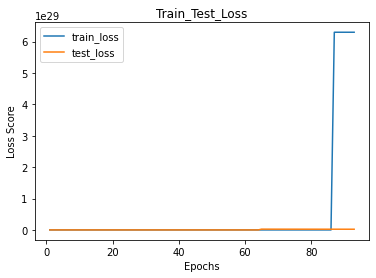

94
Train Epoch: 94 [0/7471 (0%)]	Loss: 160839.656250
Train Epoch: 94 [160/7471 (2%)]	Loss: 87899.101562
Train Epoch: 94 [320/7471 (4%)]	Loss: 20475119616.000000
Train Epoch: 94 [480/7471 (6%)]	Loss: 161350.890625
Train Epoch: 94 [640/7471 (9%)]	Loss: 24287404032.000000
Train Epoch: 94 [800/7471 (11%)]	Loss: 142337408.000000
Train Epoch: 94 [960/7471 (13%)]	Loss: 115726.671875
Train Epoch: 94 [1120/7471 (15%)]	Loss: 280157.906250
Train Epoch: 94 [1280/7471 (17%)]	Loss: 193111.375000
Train Epoch: 94 [1440/7471 (19%)]	Loss: 1443847.125000
Train Epoch: 94 [1600/7471 (21%)]	Loss: 1238642.625000
Train Epoch: 94 [1760/7471 (24%)]	Loss: 110142.382812
Train Epoch: 94 [1920/7471 (26%)]	Loss: 613801.500000
Train Epoch: 94 [2080/7471 (28%)]	Loss: 2009295328975159033856.000000
Train Epoch: 94 [2240/7471 (30%)]	Loss: 162339.109375
Train Epoch: 94 [2400/7471 (32%)]	Loss: 2001324520584666677248.000000
Train Epoch: 94 [2560/7471 (34%)]	Loss: 1177780096.000000
Train Epoch: 94 [2720/7471 (36%)]	Loss: 157

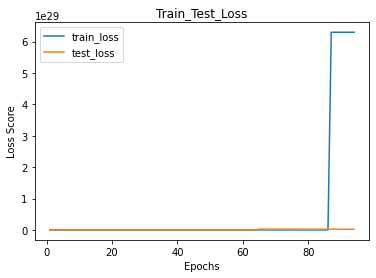

95
Train Epoch: 95 [0/7471 (0%)]	Loss: 92381.468750
Train Epoch: 95 [160/7471 (2%)]	Loss: 205877.187500
Train Epoch: 95 [320/7471 (4%)]	Loss: 21965883392.000000
Train Epoch: 95 [480/7471 (6%)]	Loss: 2552371460190838456320.000000
Train Epoch: 95 [640/7471 (9%)]	Loss: 113233090637302071296.000000
Train Epoch: 95 [800/7471 (11%)]	Loss: 141692704.000000
Train Epoch: 95 [960/7471 (13%)]	Loss: 146309760.000000
Train Epoch: 95 [1120/7471 (15%)]	Loss: 91981.046875
Train Epoch: 95 [1280/7471 (17%)]	Loss: 7800883635901993844736.000000
Train Epoch: 95 [1440/7471 (19%)]	Loss: 1685345920.000000
Train Epoch: 95 [1600/7471 (21%)]	Loss: 487922144.000000
Train Epoch: 95 [1760/7471 (24%)]	Loss: 49555568.000000
Train Epoch: 95 [1920/7471 (26%)]	Loss: 2537283584.000000
Train Epoch: 95 [2080/7471 (28%)]	Loss: 914567808.000000
Train Epoch: 95 [2240/7471 (30%)]	Loss: 110814.226562
Train Epoch: 95 [2400/7471 (32%)]	Loss: 118959.070312
Train Epoch: 95 [2560/7471 (34%)]	Loss: 96786.164062
Train Epoch: 95 [2720/

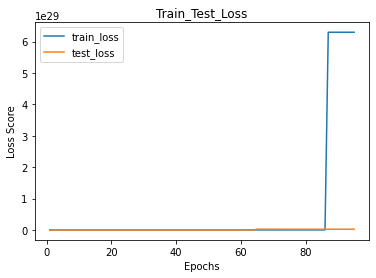

96
Train Epoch: 96 [0/7471 (0%)]	Loss: 11286135.000000
Train Epoch: 96 [160/7471 (2%)]	Loss: 158360928256.000000
Train Epoch: 96 [320/7471 (4%)]	Loss: 111482.390625
Train Epoch: 96 [480/7471 (6%)]	Loss: 133271976.000000
Train Epoch: 96 [640/7471 (9%)]	Loss: 151662.812500
Train Epoch: 96 [800/7471 (11%)]	Loss: 89821.289062
Train Epoch: 96 [960/7471 (13%)]	Loss: 92460.625000
Train Epoch: 96 [1120/7471 (15%)]	Loss: 218985.531250
Train Epoch: 96 [1280/7471 (17%)]	Loss: 4268991078707094355968.000000
Train Epoch: 96 [1440/7471 (19%)]	Loss: 163682.718750
Train Epoch: 96 [1600/7471 (21%)]	Loss: 95170.195312
Train Epoch: 96 [1760/7471 (24%)]	Loss: 89867.250000
Train Epoch: 96 [1920/7471 (26%)]	Loss: 70443664.000000
Train Epoch: 96 [2080/7471 (28%)]	Loss: 90639.609375
Train Epoch: 96 [2240/7471 (30%)]	Loss: 93206.828125
Train Epoch: 96 [2400/7471 (32%)]	Loss: 116413318069481373696.000000
Train Epoch: 96 [2560/7471 (34%)]	Loss: 102400.117188
Train Epoch: 96 [2720/7471 (36%)]	Loss: 93236.976562
Tr

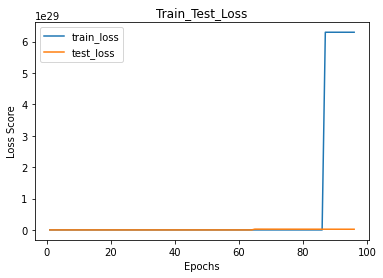

97
Train Epoch: 97 [0/7471 (0%)]	Loss: 6513707011653465276416.000000
Train Epoch: 97 [160/7471 (2%)]	Loss: 470594.031250
Train Epoch: 97 [320/7471 (4%)]	Loss: 246382.609375
Train Epoch: 97 [480/7471 (6%)]	Loss: 436666.750000
Train Epoch: 97 [640/7471 (9%)]	Loss: 97795.414062
Train Epoch: 97 [800/7471 (11%)]	Loss: 93160.640625
Train Epoch: 97 [960/7471 (13%)]	Loss: 92315.789062
Train Epoch: 97 [1120/7471 (15%)]	Loss: 115916.664062
Train Epoch: 97 [1280/7471 (17%)]	Loss: 17574526.000000
Train Epoch: 97 [1440/7471 (19%)]	Loss: 895953664.000000
Train Epoch: 97 [1600/7471 (21%)]	Loss: 93533.679688
Train Epoch: 97 [1760/7471 (24%)]	Loss: 139907744.000000
Train Epoch: 97 [1920/7471 (26%)]	Loss: 34212288.000000
Train Epoch: 97 [2080/7471 (28%)]	Loss: 381135.687500
Train Epoch: 97 [2240/7471 (30%)]	Loss: 2477658712697598902272.000000
Train Epoch: 97 [2400/7471 (32%)]	Loss: 92431.890625
Train Epoch: 97 [2560/7471 (34%)]	Loss: 6415909888.000000
Train Epoch: 97 [2720/7471 (36%)]	Loss: 1628418432.0

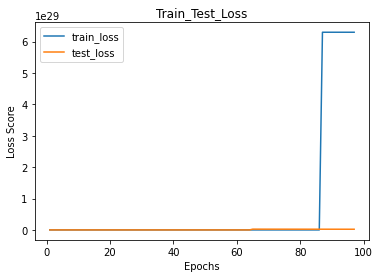

98
Train Epoch: 98 [0/7471 (0%)]	Loss: 97489.382812
Train Epoch: 98 [160/7471 (2%)]	Loss: 94566.187500
Train Epoch: 98 [320/7471 (4%)]	Loss: 120738.203125
Train Epoch: 98 [480/7471 (6%)]	Loss: 154702.968750
Train Epoch: 98 [640/7471 (9%)]	Loss: 165131026432.000000
Train Epoch: 98 [800/7471 (11%)]	Loss: 763862.500000
Train Epoch: 98 [960/7471 (13%)]	Loss: 101840.578125
Train Epoch: 98 [1120/7471 (15%)]	Loss: 2001904921986644049920.000000
Train Epoch: 98 [1280/7471 (17%)]	Loss: 84448.625000
Train Epoch: 98 [1440/7471 (19%)]	Loss: 93100.937500
Train Epoch: 98 [1600/7471 (21%)]	Loss: 148684.218750
Train Epoch: 98 [1760/7471 (24%)]	Loss: 92857.640625
Train Epoch: 98 [1920/7471 (26%)]	Loss: 1904880384.000000
Train Epoch: 98 [2080/7471 (28%)]	Loss: 97049.328125
Train Epoch: 98 [2240/7471 (30%)]	Loss: 89431.343750
Train Epoch: 98 [2400/7471 (32%)]	Loss: 91854.640625
Train Epoch: 98 [2560/7471 (34%)]	Loss: 98033.195312
Train Epoch: 98 [2720/7471 (36%)]	Loss: 92602.015625
Train Epoch: 98 [2880/7

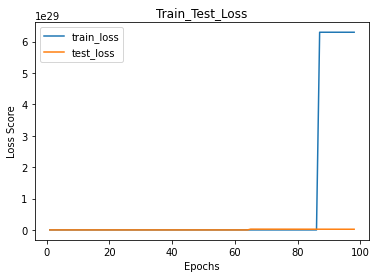

99
Train Epoch: 99 [0/7471 (0%)]	Loss: 105615080.000000
Train Epoch: 99 [160/7471 (2%)]	Loss: 267962.000000
Train Epoch: 99 [320/7471 (4%)]	Loss: 1626775936.000000
Train Epoch: 99 [480/7471 (6%)]	Loss: 5061552837005240434688.000000
Train Epoch: 99 [640/7471 (9%)]	Loss: 97811.984375
Train Epoch: 99 [800/7471 (11%)]	Loss: 3346085.500000
Train Epoch: 99 [960/7471 (13%)]	Loss: 711395520.000000
Train Epoch: 99 [1120/7471 (15%)]	Loss: 12601130304177803624448.000000
Train Epoch: 99 [1280/7471 (17%)]	Loss: 7713501981181984374784.000000
Train Epoch: 99 [1440/7471 (19%)]	Loss: 1670961664.000000
Train Epoch: 99 [1600/7471 (21%)]	Loss: 289333.250000
Train Epoch: 99 [1760/7471 (24%)]	Loss: 92811.140625
Train Epoch: 99 [1920/7471 (26%)]	Loss: 113674.617188
Train Epoch: 99 [2080/7471 (28%)]	Loss: 94637.328125
Train Epoch: 99 [2240/7471 (30%)]	Loss: 91416.093750
Train Epoch: 99 [2400/7471 (32%)]	Loss: 93330.820312
Train Epoch: 99 [2560/7471 (34%)]	Loss: 86827712.000000
Train Epoch: 99 [2720/7471 (36%)

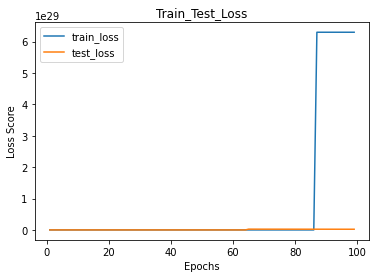

100
Train Epoch: 100 [0/7471 (0%)]	Loss: 58766548.000000
Train Epoch: 100 [160/7471 (2%)]	Loss: 333251968.000000
Train Epoch: 100 [320/7471 (4%)]	Loss: 6142003542308348231680.000000
Train Epoch: 100 [480/7471 (6%)]	Loss: 22031792.000000
Train Epoch: 100 [640/7471 (9%)]	Loss: 5387421.500000
Train Epoch: 100 [800/7471 (11%)]	Loss: 1339537664.000000
Train Epoch: 100 [960/7471 (13%)]	Loss: 6678350732730782711808.000000
Train Epoch: 100 [1120/7471 (15%)]	Loss: 2120044032.000000
Train Epoch: 100 [1280/7471 (17%)]	Loss: 95399100416.000000
Train Epoch: 100 [1440/7471 (19%)]	Loss: 95191.343750
Train Epoch: 100 [1600/7471 (21%)]	Loss: 444572.656250
Train Epoch: 100 [1760/7471 (24%)]	Loss: 160350.718750
Train Epoch: 100 [1920/7471 (26%)]	Loss: 156253.421875
Train Epoch: 100 [2080/7471 (28%)]	Loss: 3216756.000000
Train Epoch: 100 [2240/7471 (30%)]	Loss: 117515982920683974819840.000000
Train Epoch: 100 [2400/7471 (32%)]	Loss: 50684284.000000
Train Epoch: 100 [2560/7471 (34%)]	Loss: 10759377518592.0

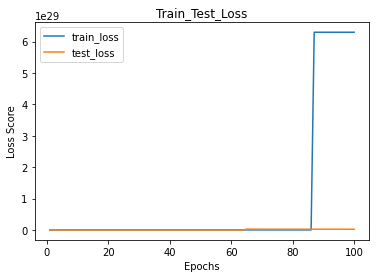

101
Train Epoch: 101 [0/7471 (0%)]	Loss: 619633.250000
Train Epoch: 101 [160/7471 (2%)]	Loss: 162441.453125
Train Epoch: 101 [320/7471 (4%)]	Loss: 91736.929688
Train Epoch: 101 [480/7471 (6%)]	Loss: 1123444594835456.000000
Train Epoch: 101 [640/7471 (9%)]	Loss: 2005352005288931098624.000000
Train Epoch: 101 [800/7471 (11%)]	Loss: 71979744.000000
Train Epoch: 101 [960/7471 (13%)]	Loss: 705549760.000000
Train Epoch: 101 [1120/7471 (15%)]	Loss: 7782604650914403844096.000000
Train Epoch: 101 [1280/7471 (17%)]	Loss: 111005.125000
Train Epoch: 101 [1440/7471 (19%)]	Loss: 106259.703125
Train Epoch: 101 [1600/7471 (21%)]	Loss: 7709031032651912314880.000000
Train Epoch: 101 [1760/7471 (24%)]	Loss: 92962.187500
Train Epoch: 101 [1920/7471 (26%)]	Loss: 542386.625000
Train Epoch: 101 [2080/7471 (28%)]	Loss: 109527.835938
Train Epoch: 101 [2240/7471 (30%)]	Loss: 114424946688.000000
Train Epoch: 101 [2400/7471 (32%)]	Loss: 1942519753612694913024.000000
Train Epoch: 101 [2560/7471 (34%)]	Loss: 92387.

In [ ]:
epochs = 150


for epoch in range(1, epochs + 1):
        print(epoch)
        train(epoch)
        test(epoch)

        # change liveloss to my model
        # https://github.com/stared/livelossplot/blob/master/examples/pytorch.ipynb
        # https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-5.php
        plt.plot(Epoch_Loss['train_epoch'],Epoch_Loss['train_loss'], label="train_loss")
        plt.plot(Epoch_Loss['test_epoch'],Epoch_Loss['test_loss'], label="test_loss")
        plt.xlabel('Epochs')
        plt.ylabel('Loss Score')
        plt.title('Train_Test_Loss')
        plt.legend()
        plt.savefig('./plot_Exp06/'+str(epoch)+'_epoch.png', dpi=300)
        plt.show()
    
        with torch.no_grad():
            sample = torch.randn(16, 100).to(device)  # Change it (64, 100) to (16, 100)
            sample = model.decode(sample).cpu()
            save_image(sample.view(16, 1, 224, 224),  # (64, 1, 224, 224) to (16, 1, 224, 224)
                       './results_Exp06/sample_' + str(epoch) + '.png')
        

In [ ]:
# Save Dictionary to pkl
# test_dict = {'train_epoch': [1, 2, 3, 4, 5],
#              'train_loss': [5, 4, 3, 2, 1],
#              'test_epoch':[1, 2, 3, 4, 5],
#              'test_loss': [6, 5, 3, 2, 1]}

import csv

with open('./Epoch_Loss.csv', 'w') as f:
    for key in Epoch_Loss.keys():
        f.write("%s, %s\n" %(key, Epoch_Loss[key]))

In [ ]:
# 

with open('./Epoch_Loss_2.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in Epoch_Loss.items():
        writer.writerow([key, value])

In [ ]:
# 
test_dict

out_path= "./test.txt"

fieldnames = sorted(list(set(k for d in test_dict for k in d)))

with open(out_path, 'wb') as out_file:
    writer = csv.DictWriter(out_file, fieldnames=fieldnames, dialect='excel')
    writer.writeheader()
    writer.writerows(test_dict)

TypeError: ignored